In [3]:
import os
import pandas as pd
import re

In [4]:
base_path = r"C:\Users\chen\Desktop\out_stat"
file_path = os.path.join(base_path,"darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover.xls")

In [5]:
path_df = pd.read_csv(file_path,header=None,sep="\t")

In [6]:
path_df

,0,1,2,3,4,5,6,7,8
0,chr1,2337204,2337273,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,69,69,1.0
1,chr1,2337922,2338058,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,136,136,1.0
2,chr1,2338158,2338394,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,236,236,1.0
3,chr1,2339890,2340297,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,407,407,1.0
4,chr1,2341809,2341890,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:234...,1,81,81,1.0
...,...,...,...,...,...,...,...,...,...
7064,chrX,154215511,154215580,F8,cds-NP_000123.1;rna-NM_000132.4:chrX:154215511...,1,69,69,1.0
7065,chrX,154221210,154221423,F8,cds-NP_000123.1;rna-NM_000132.4:chrX:154221210...,1,213,213,1.0
7066,chrX,154225247,154225370,F8,cds-NP_000123.1;rna-NM_000132.4:chrX:154225247...,1,123,123,1.0
7067,chrX,154227753,154227875,F8,cds-NP_000123.1;rna-NM_000132.4:chrX:154227753...,1,122,122,1.0


In [7]:
group_df = path_df.groupby(3).sum()

In [8]:
group_df

,1,2,5,6,7,8
3,,,,,,
AAAS,859294187,859295828,16,1641,1641,16.0
ABCA12,11440534585,11440542404,53,7819,7819,53.0
ABCA4,4725392767,4725399589,50,6822,6822,50.0
ABCB11,4585282102,4585286068,27,3966,3966,27.0
ABCB4,2350684414,2350688275,27,3861,3861,27.0
...,...,...,...,...,...,...
WNT10A,879004799,879006053,4,1254,1254,4.0
WRN,1052906984,1052911283,34,4299,4299,34.0
XPA,703159827,703160695,6,822,868,6.0


In [40]:

base_path = r"C:\Users\chen\Desktop\out_stat"
output_df_list = []
# print(os.path.splitext("darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover.xls"))
for files in list(os.walk(base_path)):
#     print("file")
    path_list,next_path,current_path = files
#     print(path_list,next_path,current_path)
    file_Name1 = r"([.\s\S]*?).xls"
    
    for path in current_path:
        file_name = (re.findall(file_Name1,path))
        read_path = os.path.join(base_path,path)
#         print("current_path",current_path)
        path_df = pd.read_csv(read_path,header=None,sep="\t")
#         print(len(path_df))
        group_df = path_df.groupby(3).sum()
        gene_ratio = group_df[6]/group_df[7]
#         print("gene_ratio",gene_ratio)
        data_dict = dict(gene_ratio)
        output_df = pd.DataFrame()
        ddf = output_df.from_dict(data_dict,orient="index",columns=[file_name])
#         display(ddf)
        output_df_list.append(ddf.T)


        
    

In [41]:
rdf = pd.concat(output_df_list)

In [46]:
rdf = rdf.T

In [49]:
rdf.head()

,darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover,darui_big_panel_bed.CDS_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover,darui_big_panel_bed.CDS_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover,darui_big_panel_bed.CDS_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover,darui_big_panel_bed.CDS_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover,darui_big_panel_bed.CDS_cover_xgen-inherited-disease-hyb-panel-targets.bed.cover,darui_big_panel_bed.exon_cover_hs_hg19_ClinExome.bed.cover,darui_big_panel_bed.exon_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover,darui_big_panel_bed.exon_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover,darui_big_panel_bed.exon_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover,...,yunkang_big_panel_bed.CDS_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover,yunkang_big_panel_bed.CDS_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover,yunkang_big_panel_bed.CDS_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover,yunkang_big_panel_bed.CDS_cover_xgen-inherited-disease-hyb-panel-targets.bed.cover,yunkang_big_panel_bed.exon_cover_hs_hg19_ClinExome.bed.cover,yunkang_big_panel_bed.exon_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover,yunkang_big_panel_bed.exon_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover,yunkang_big_panel_bed.exon_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover,yunkang_big_panel_bed.exon_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover,yunkang_big_panel_bed.exon_cover_xgen-inherited-disease-hyb-panel-targets.bed.cover
AAAS,1.0,0.989640,0.990250,0.979890,1.0,1.0,0.952066,0.899725,0.980165,0.901377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCA12,1.0,0.991431,0.989385,0.967643,1.0,1.0,0.840746,0.821037,0.866147,0.801223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCA4,1.0,0.985635,0.984169,0.974787,1.0,1.0,0.942413,0.961517,0.927675,0.917031,...,0.984169,0.974787,1.0,1.0,0.942413,0.961517,0.927675,0.917031,0.930950,0.942276
ABCB11,1.0,0.993696,0.988654,0.957892,1.0,1.0,0.577877,0.572830,0.618835,0.553793,...,0.988654,0.957892,1.0,1.0,0.577877,0.572830,0.618835,0.553793,0.571964,0.576435
ABCB4,1.0,0.996892,0.983942,0.957006,1.0,1.0,0.900325,0.923737,0.929532,0.857904,...,0.983942,0.957006,1.0,1.0,0.900325,0.923737,0.929532,0.857904,0.894993,0.898470


In [54]:
rdf.to_excel('out_stat.xlsx')

In [52]:
pd.set_option("display.max_rows",None)

In [53]:
rdf.loc["AAAS"]

darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover                                             1.000000
darui_big_panel_bed.CDS_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover                   0.989640
darui_big_panel_bed.CDS_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover                          0.990250
darui_big_panel_bed.CDS_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover                            0.979890
darui_big_panel_bed.CDS_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover                          1.000000
darui_big_panel_bed.CDS_cover_xgen-inherited-disease-hyb-panel-targets.bed.cover                      1.000000
darui_big_panel_bed.exon_cover_hs_hg19_ClinExome.bed.cover                                            0.952066
darui_big_panel_bed.exon_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover                  0.899725
darui_big_panel_bed.exon_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover                         0.980165
d

In [55]:
# 创建一个空的输出df
output_df = pd.DataFrame()

ret_values_list = []
for basePath,next_path,path_name in os.walk(base_path):
    worker_path = path_name
    """
        伪代码
    """
    # 每个文件数据处理 df
    # df -> 每个基因的比例
    # 将比例缓存到 ret_values_list:
    """
    {worker_path1:[{基因名1：比例1}，{基因名2：比例2}，{基因名3：比例4}....]},
    {worker_path2:[{基因名1：比例1}，{基因名2：比例2}，{基因名3：比例4}....]},
    {worker_path3:[{基因名1：比例1}，{基因名2：比例2}，{基因名3：比例4}....]},
    
    
    """
    # ret_df 格式：
    """
             基因名
    文件名    比例
    
    """
    
    return ret_df
    
    

('C:\\Users\\chen\\Desktop\\out_stat', [], ['darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover.xls', 'darui_big_panel_bed.CDS_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover.xls', 'darui_big_panel_bed.CDS_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover.xls', 'darui_big_panel_bed.CDS_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover.xls', 'darui_big_panel_bed.CDS_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover.xls', 'darui_big_panel_bed.CDS_cover_xgen-inherited-disease-hyb-panel-targets.bed.cover.xls', 'darui_big_panel_bed.exon_cover_hs_hg19_ClinExome.bed.cover.xls', 'darui_big_panel_bed.exon_cover_KAPA_HyperCap_Heredity_capture_targets.hg19.bed.cover.xls', 'darui_big_panel_bed.exon_cover_KAPA_HyperExome_hg19_capture_targets.bed.cover.xls', 'darui_big_panel_bed.exon_cover_QuarXeq_Human_Whole_Exome_3.0.hg19.bed.cover.xls', 'darui_big_panel_bed.exon_cover_xgen-exome-hyb-panel-v2-targets-hg19.bed.cover.xls', 'darui_big_panel_bed.exon_cover_xgen-inherited-dise

In [ ]:
# 新建统计缓存列表，格式：
"""
        文件名1  文件名1   文件名1  文件名1 .....
基因名   比例1     比例2    比例3     比例3

"""
ret_values = []
for k_value in ret_values_list:
    for path,values in k_value.items():
        pass
    # 在output_df中新增一行 输出格式为 ： 


    #
    output_df.append()
    # output_df["pa"] = worker_path

In [44]:
df = pd.read_excel(r"C:\Users\chen\Desktop\out_stat\darui_big_panel_bed.CDS_cover_hs_hg19_ClinExome.bed.cover.xls")

,0,1,2,3,4,5,6,7,8
0,chr1,2337204,2337273,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,69,69,1.0
1,chr1,2337922,2338058,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,136,136,1.0
2,chr1,2338158,2338394,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,236,236,1.0
3,chr1,2339890,2340297,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:233...,1,407,407,1.0
4,chr1,2341809,2341890,PEX10,cds-NP_001361354.1;rna-NM_001374425.1:chr1:234...,1,81,81,1.0


,0,1,2,3,4,5,6,7,8
1349,chr12,53701272,53701497,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,225,225,1.0
1350,chr12,53701628,53701713,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,85,85,1.0
1351,chr12,53701835,53701917,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,82,82,1.0
1352,chr12,53702065,53702133,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,68,68,1.0
1353,chr12,53702218,53702312,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,94,94,1.0
1354,chr12,53702508,53702599,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,91,91,1.0
1355,chr12,53702743,53702804,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,61,61,1.0
1356,chr12,53702940,53703065,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,125,125,1.0
1357,chr12,53703384,53703505,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,121,121,1.0
1358,chr12,53708081,53708225,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,144,144,1.0


In [46]:
group_df = df.groupby(3)

C:\Users\chen\.conda\envs\autoreport\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


3
AAAS       AxesSubplot(0.125,0.125;0.775x0.755)
ABCA12     AxesSubplot(0.125,0.125;0.775x0.755)
ABCA4      AxesSubplot(0.125,0.125;0.775x0.755)
ABCB11     AxesSubplot(0.125,0.125;0.775x0.755)
ABCB4      AxesSubplot(0.125,0.125;0.775x0.755)
                           ...                 
WNT10A     AxesSubplot(0.125,0.125;0.775x0.755)
WRN        AxesSubplot(0.125,0.125;0.775x0.755)
XPA        AxesSubplot(0.125,0.125;0.775x0.755)
XPC        AxesSubplot(0.125,0.125;0.775x0.755)
ZFYVE26    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 419, dtype: object

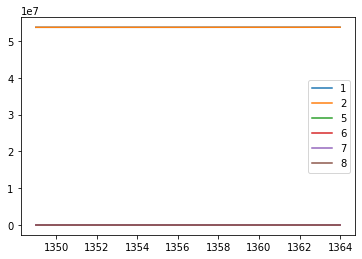

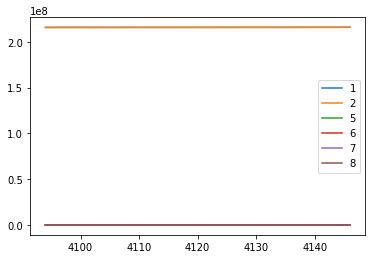

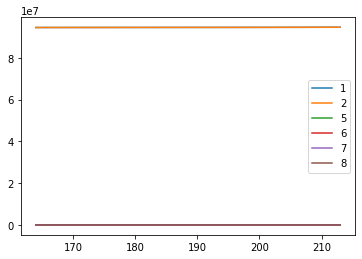

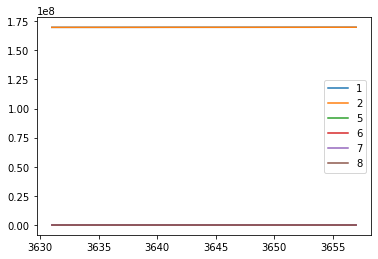

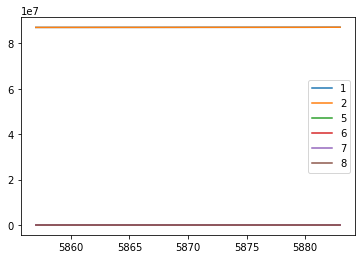

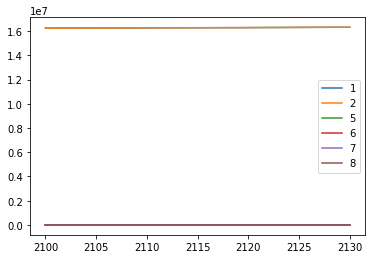

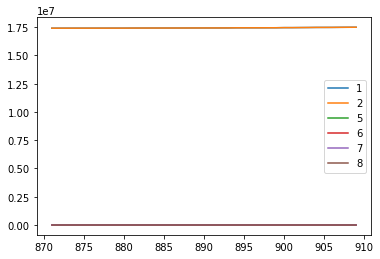

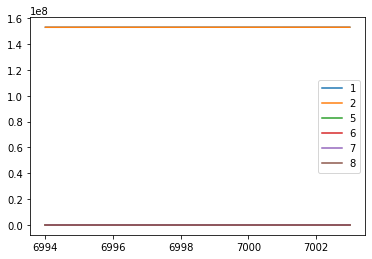

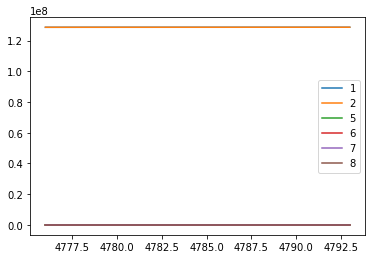

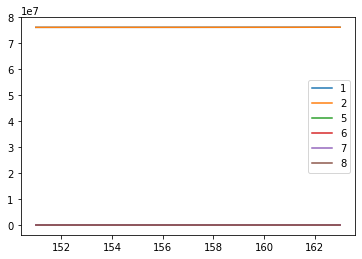

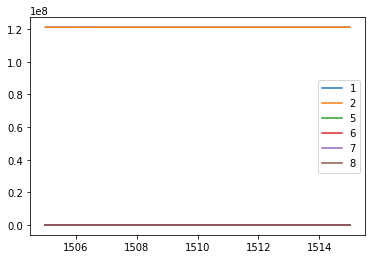

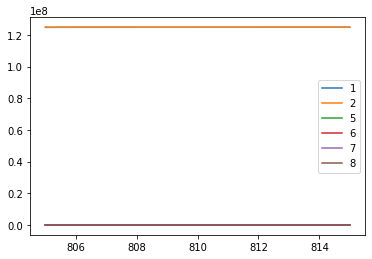

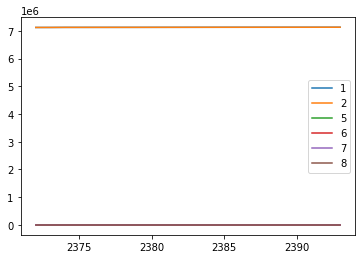

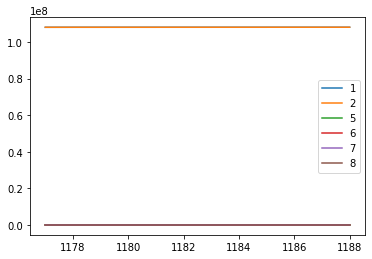

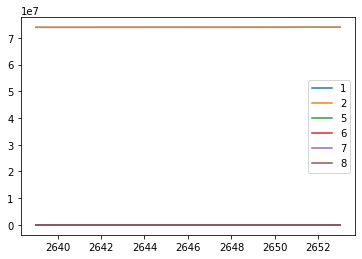

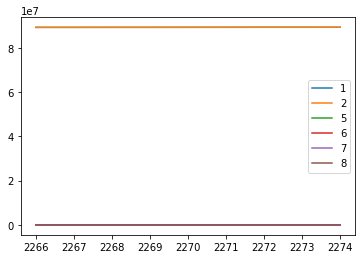

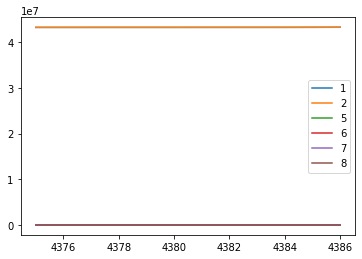

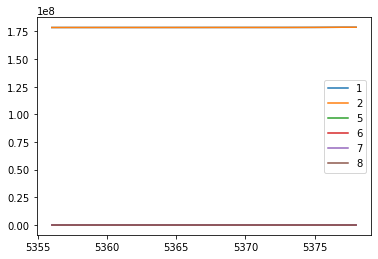

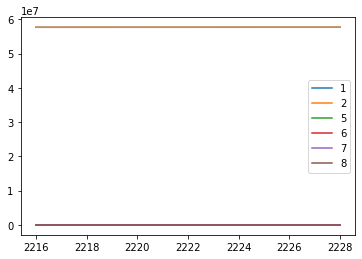

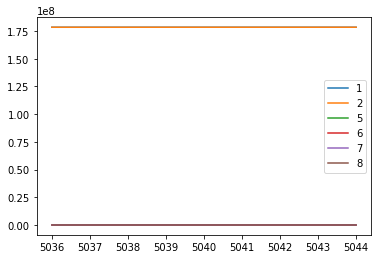

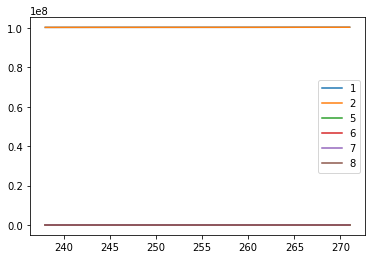

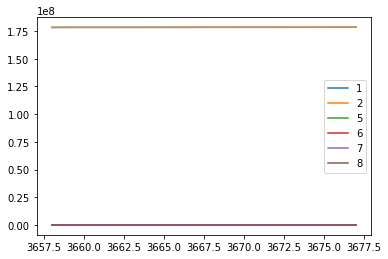

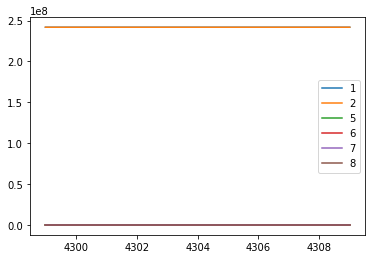

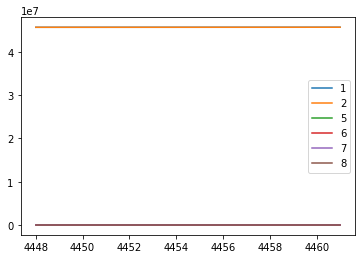

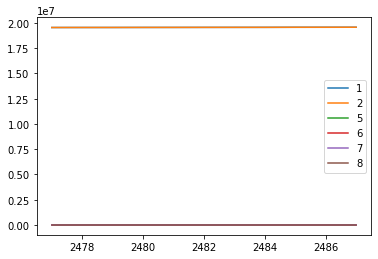

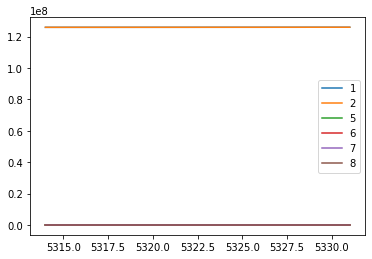

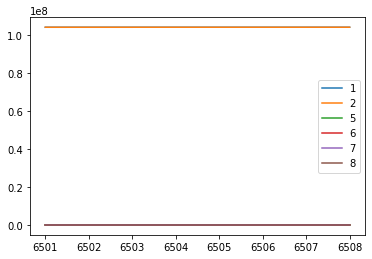

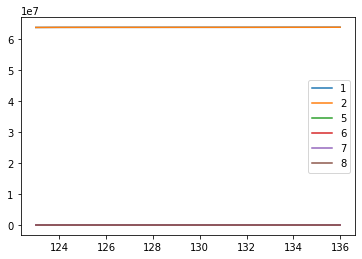

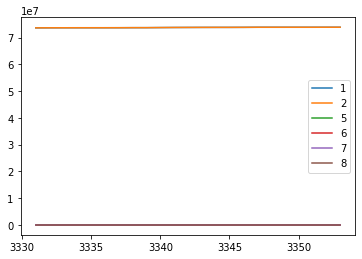

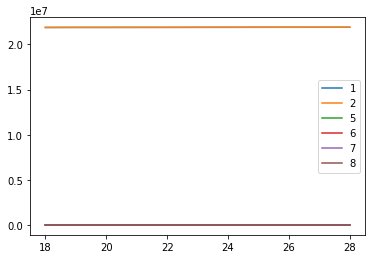

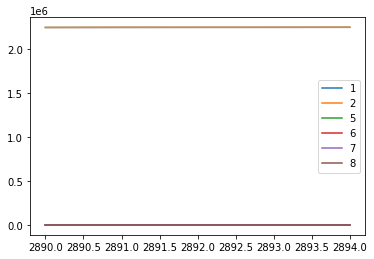

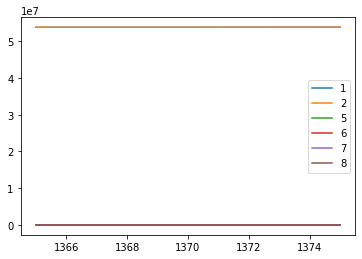

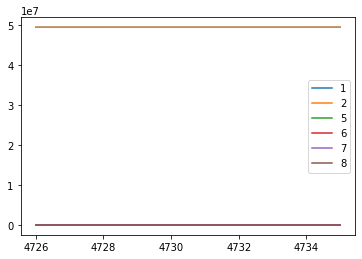

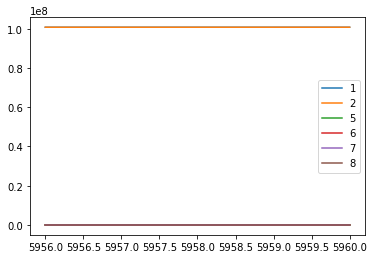

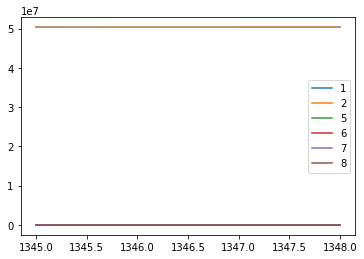

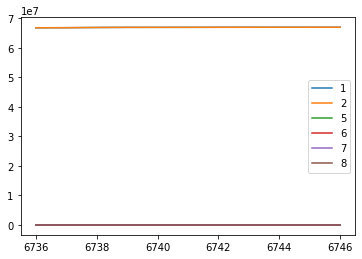

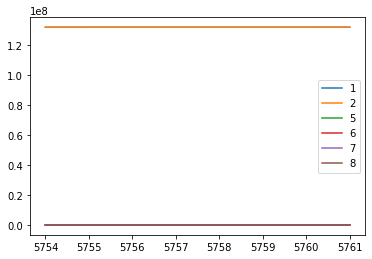

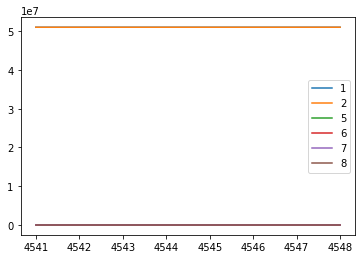

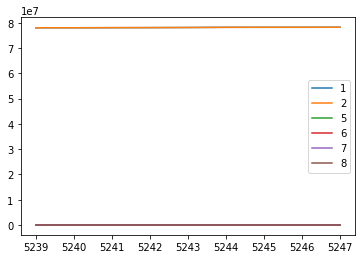

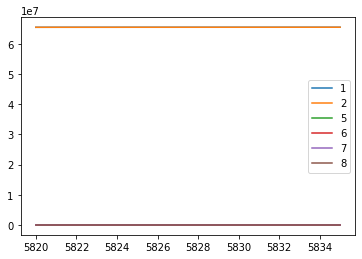

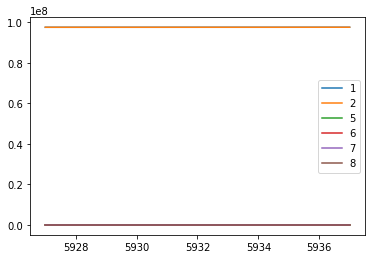

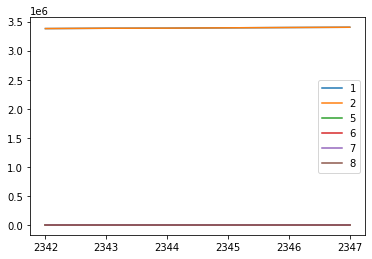

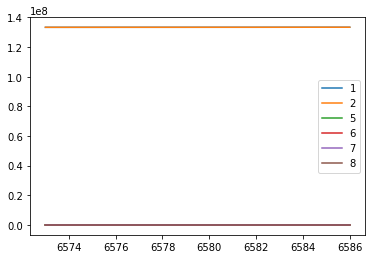

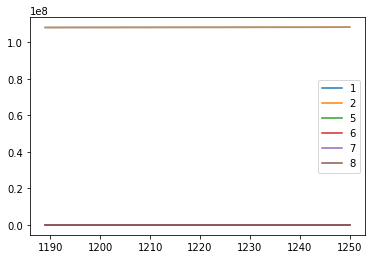

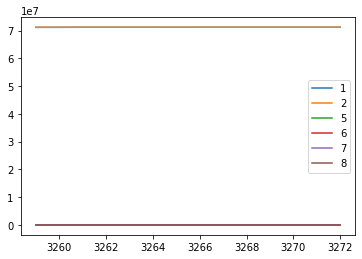

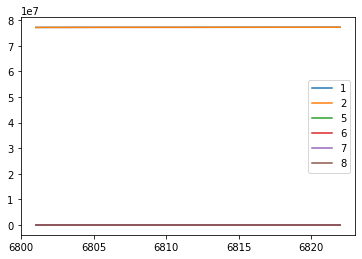

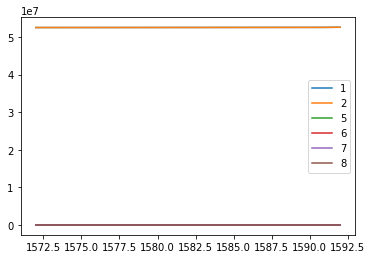

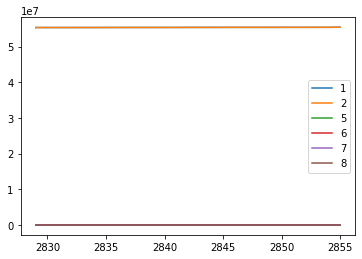

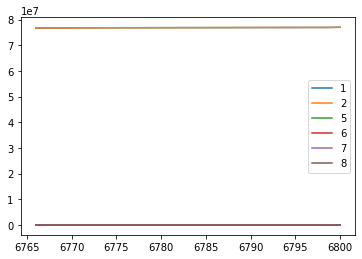

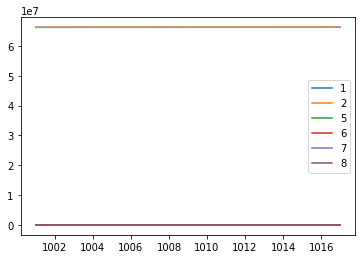

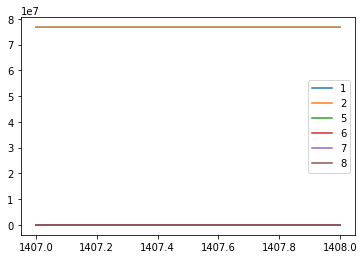

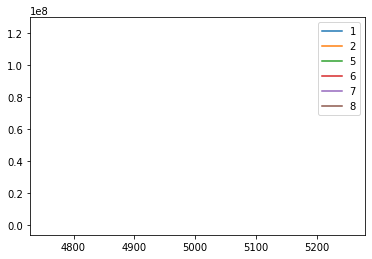

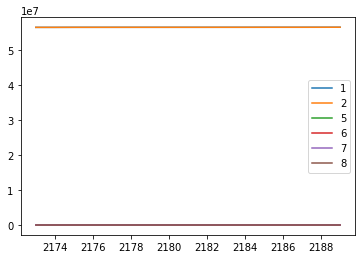

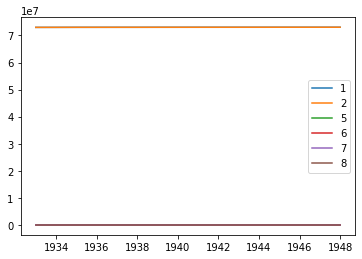

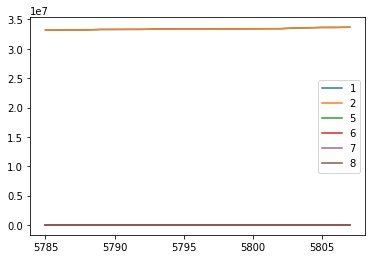

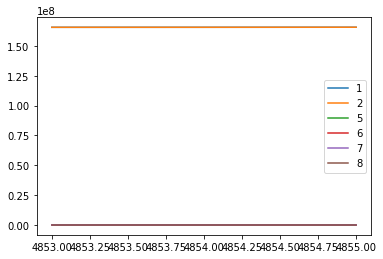

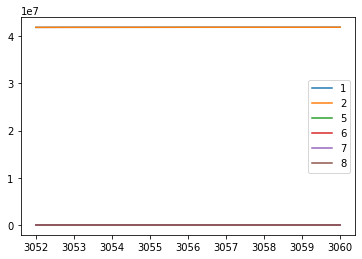

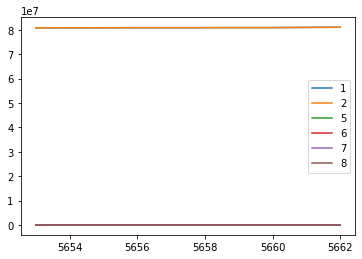

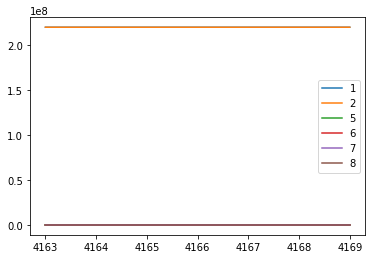

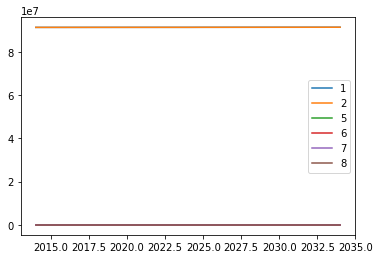

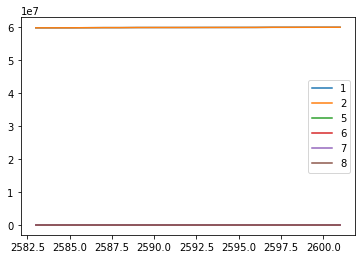

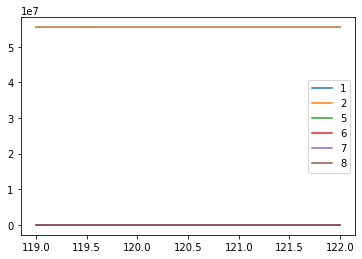

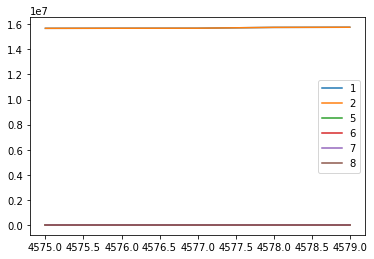

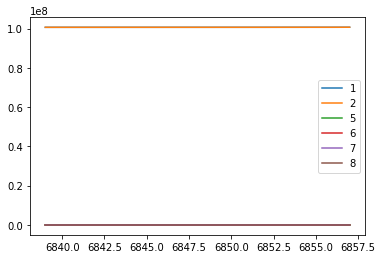

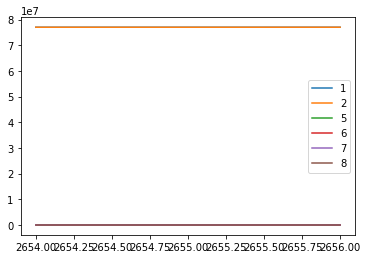

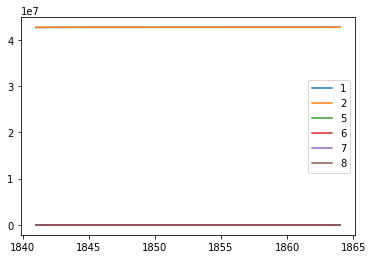

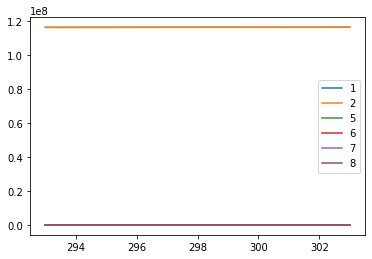

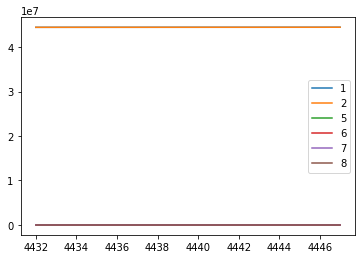

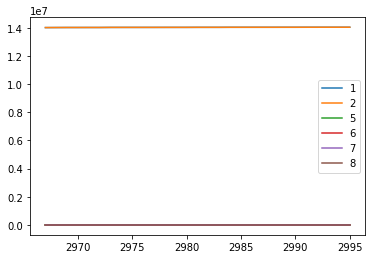

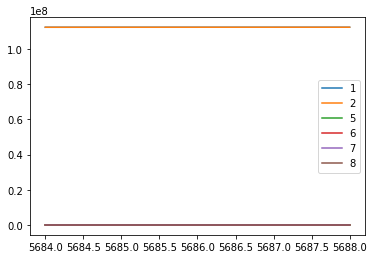

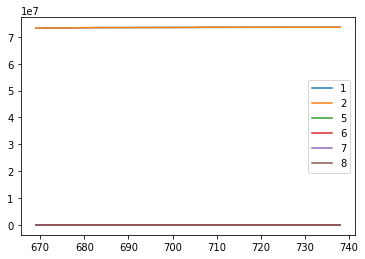

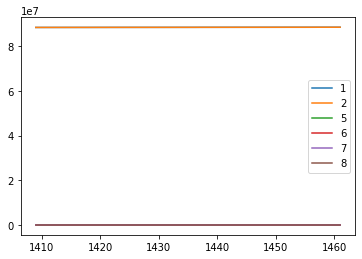

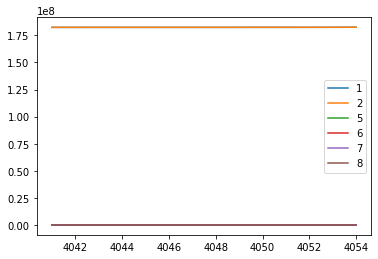

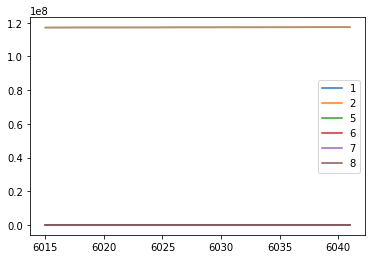

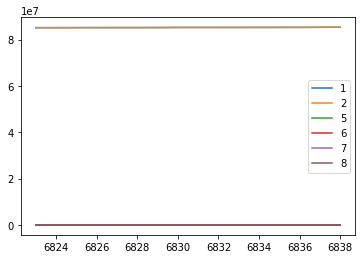

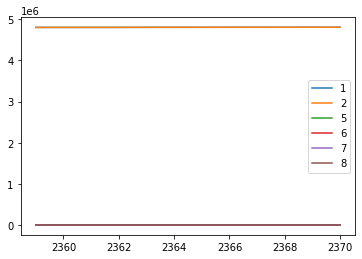

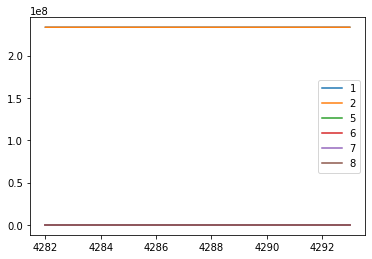

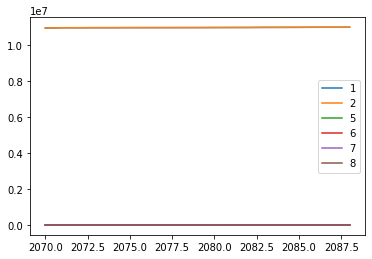

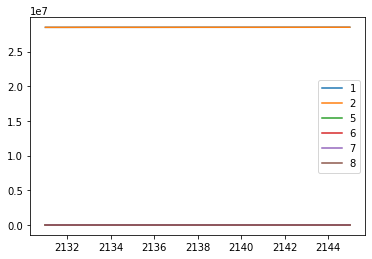

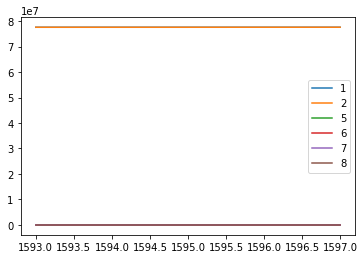

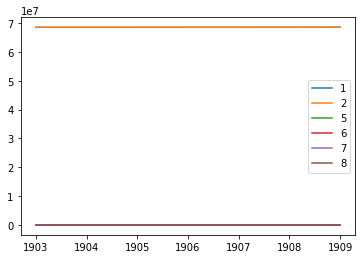

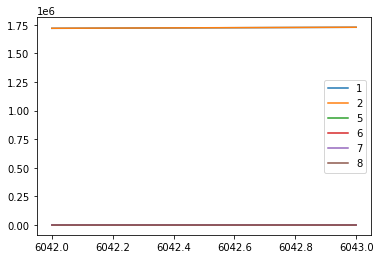

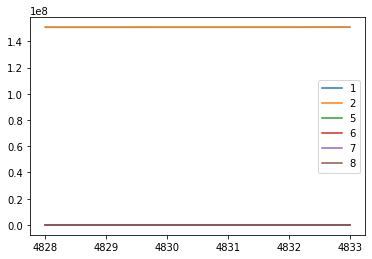

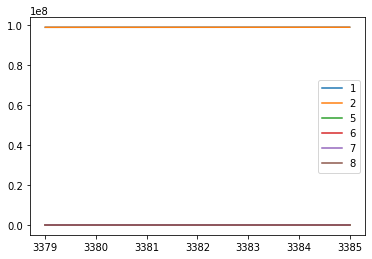

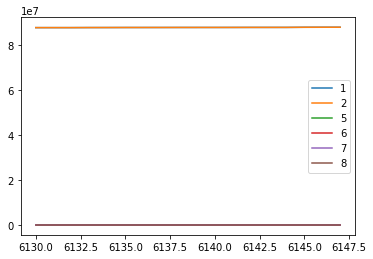

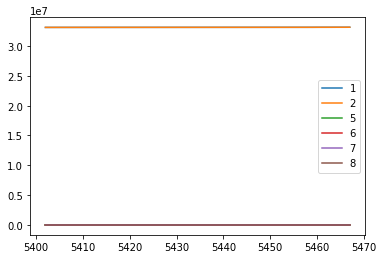

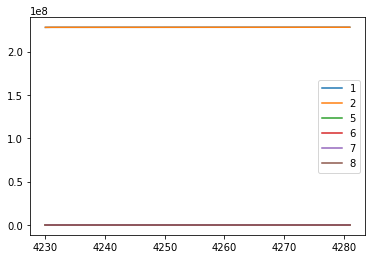

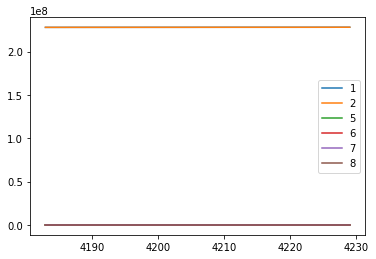

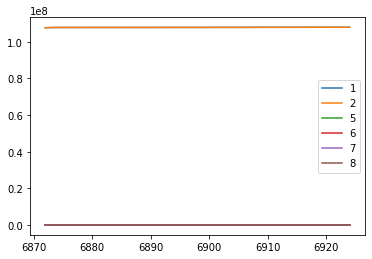

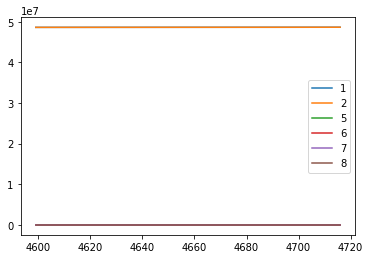

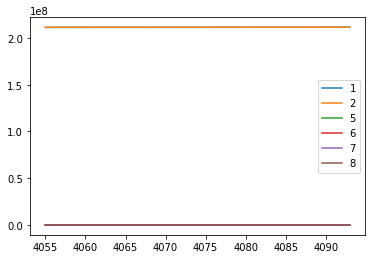

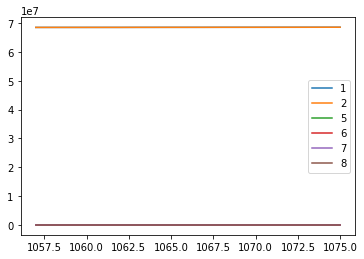

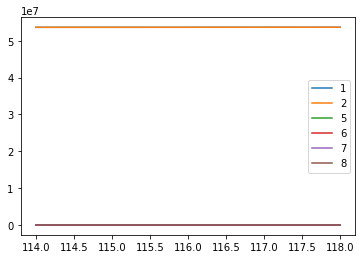

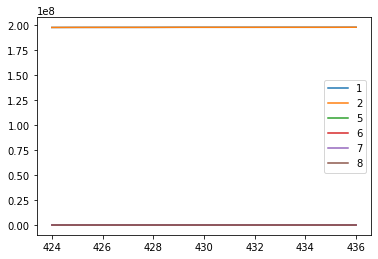

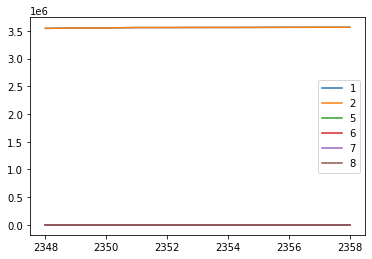

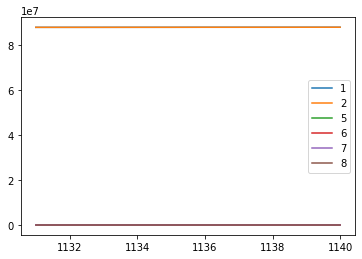

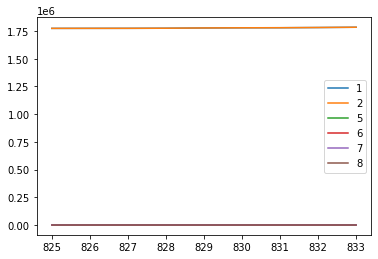

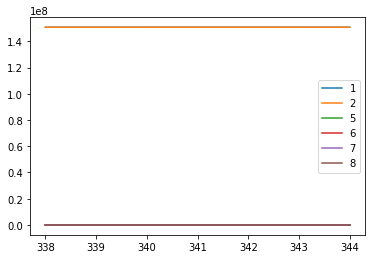

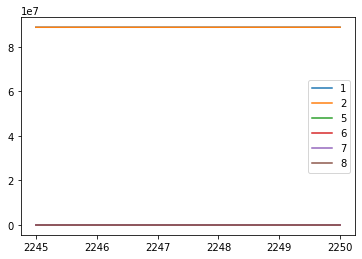

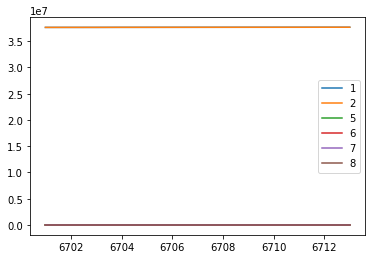

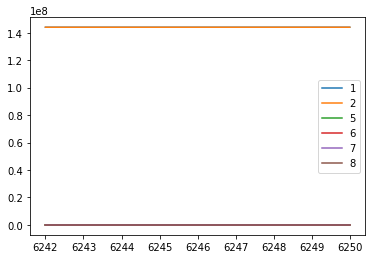

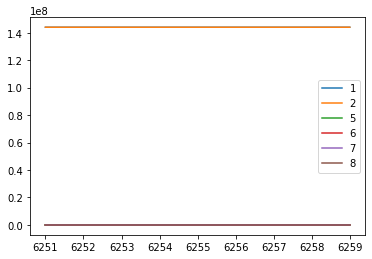

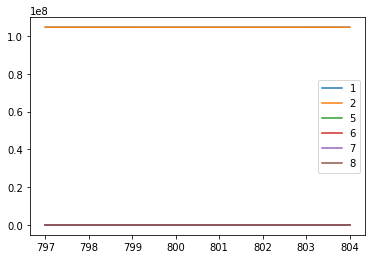

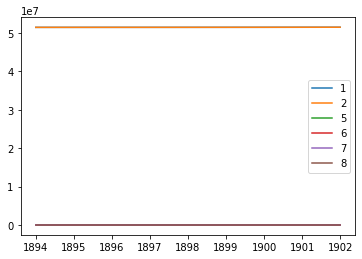

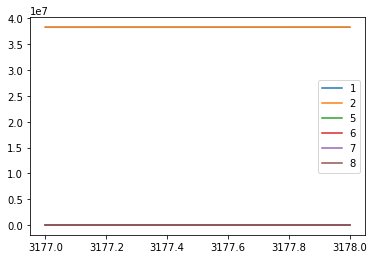

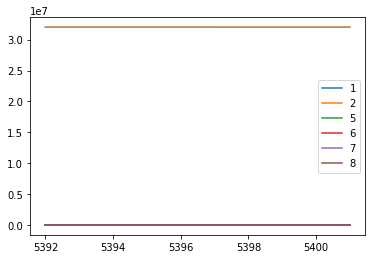

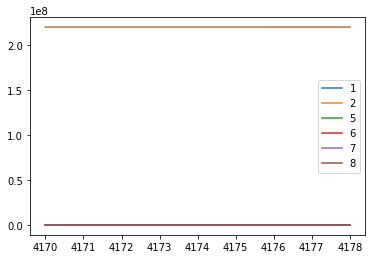

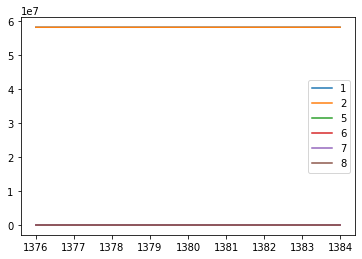

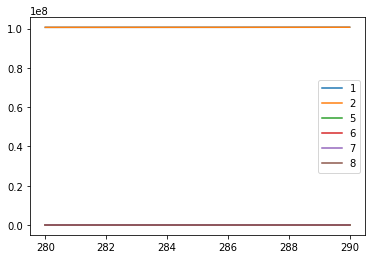

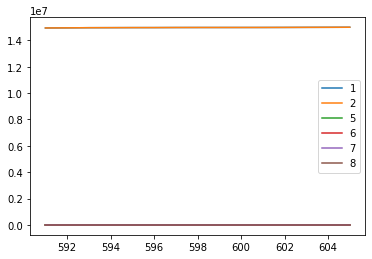

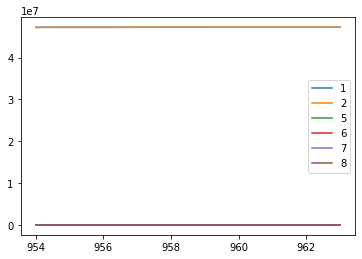

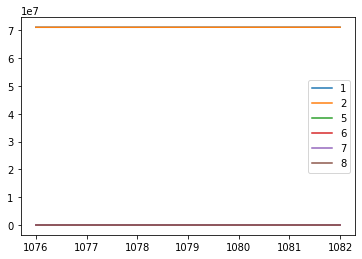

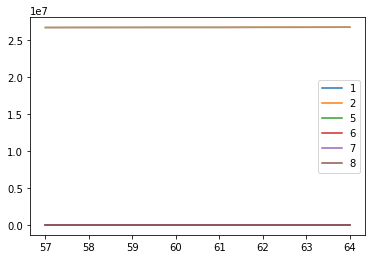

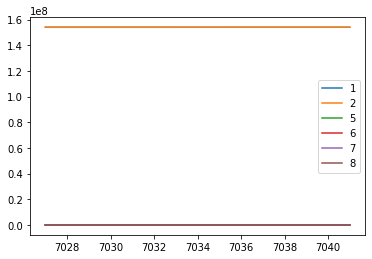

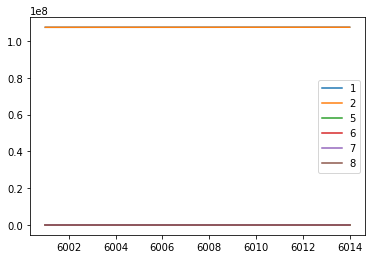

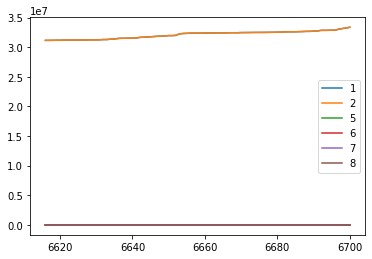

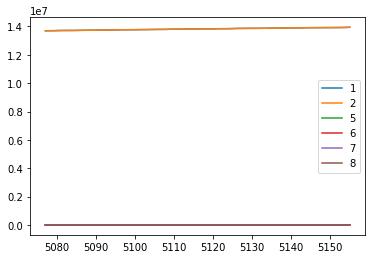

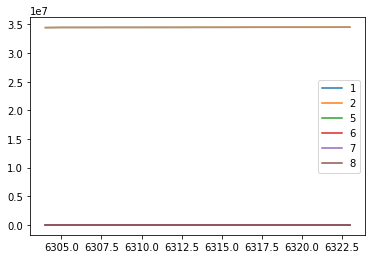

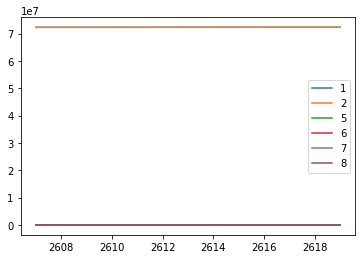

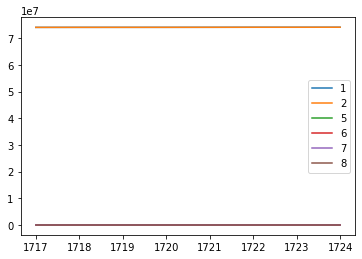

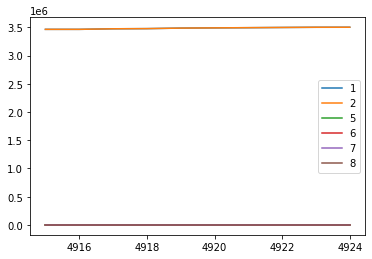

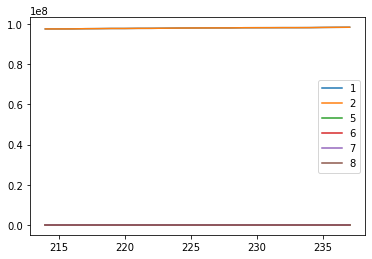

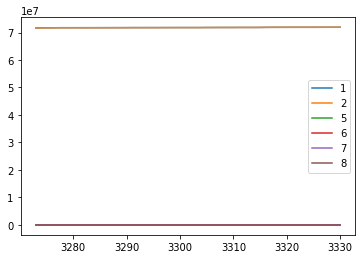

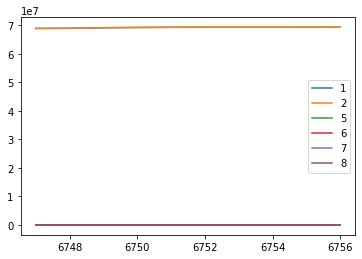

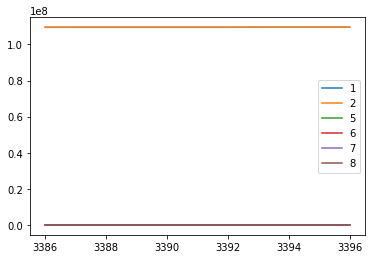

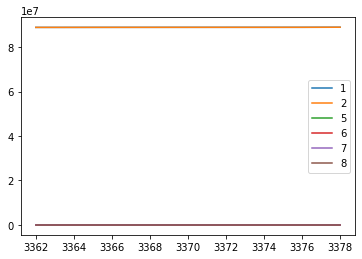

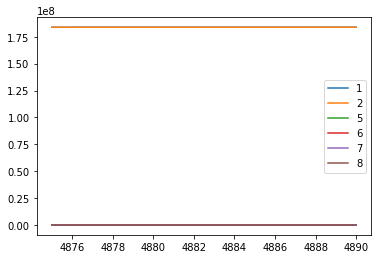

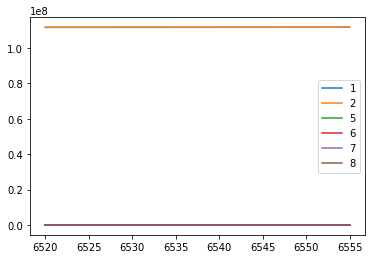

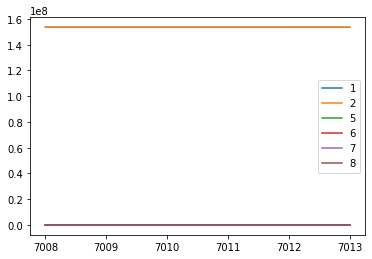

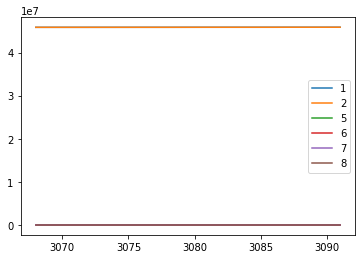

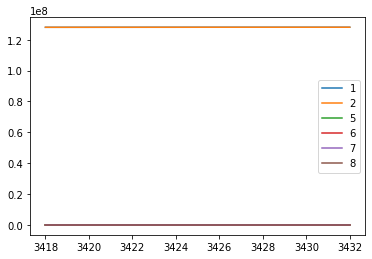

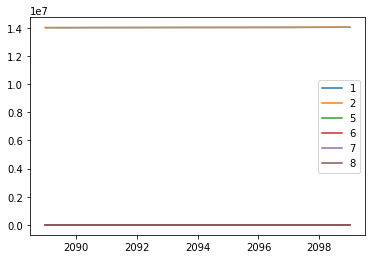

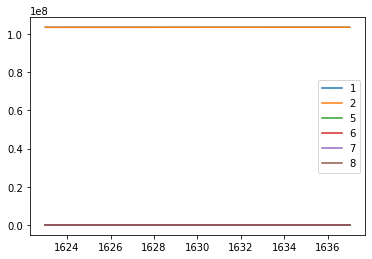

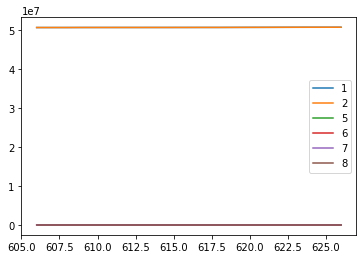

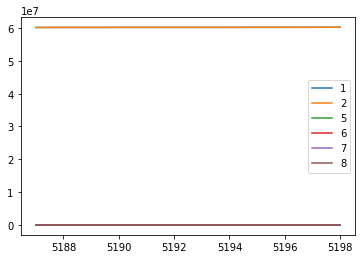

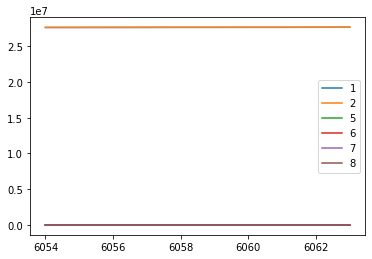

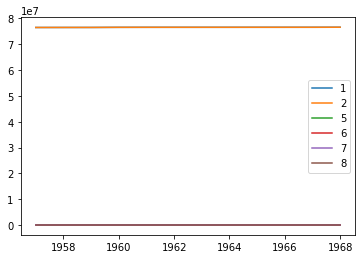

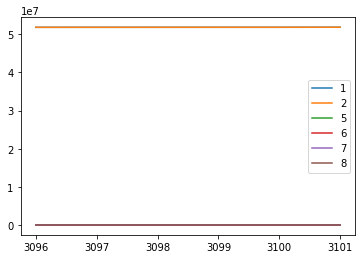

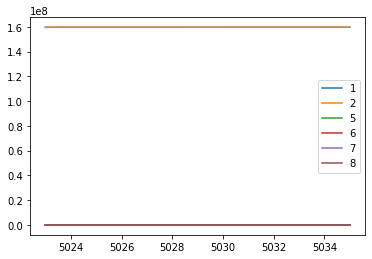

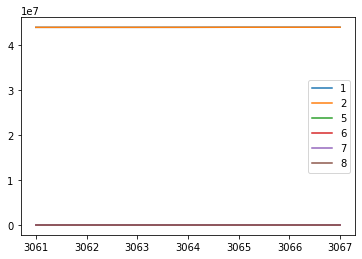

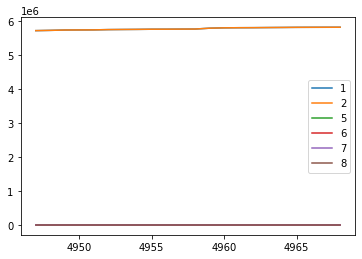

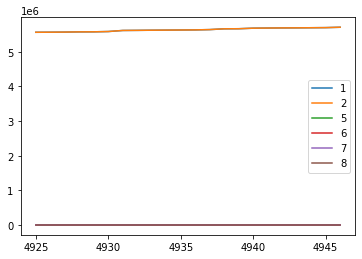

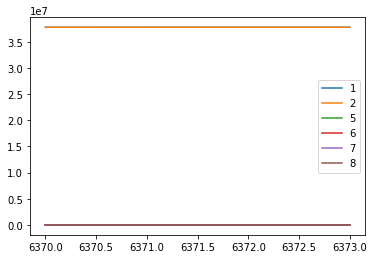

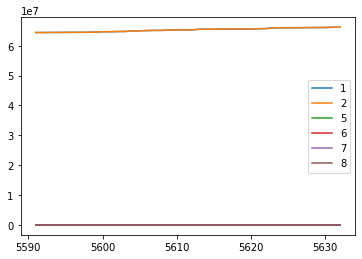

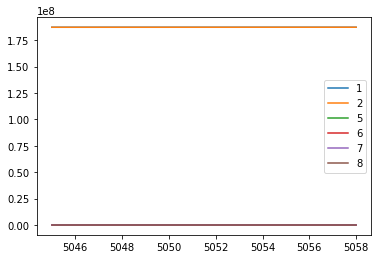

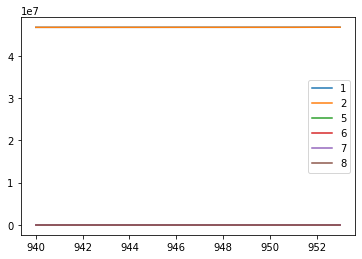

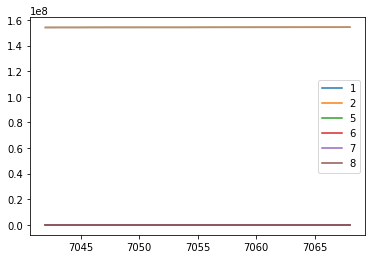

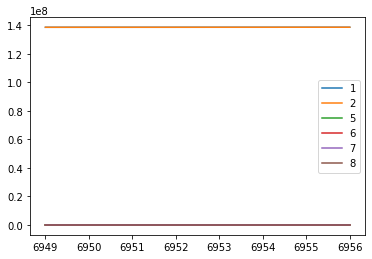

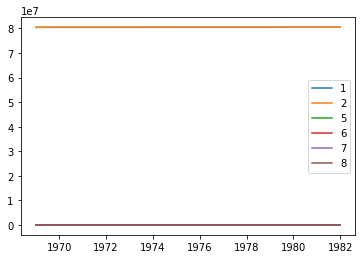

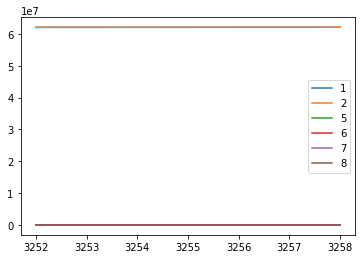

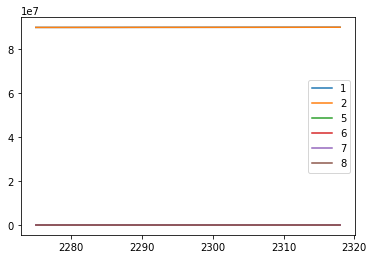

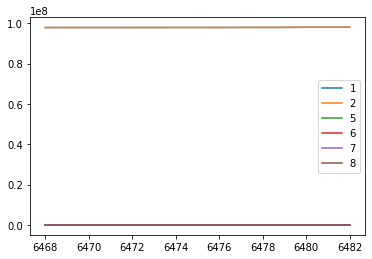

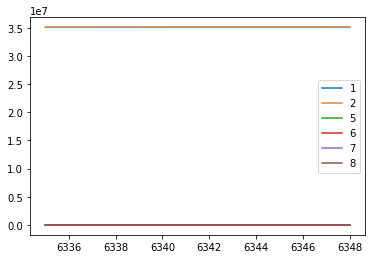

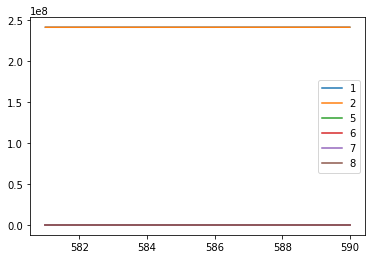

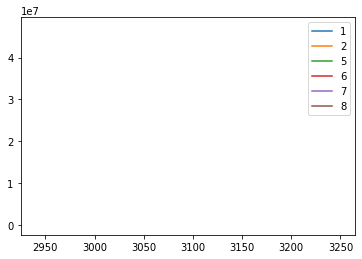

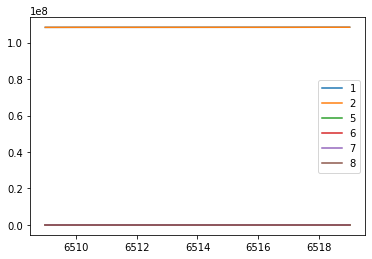

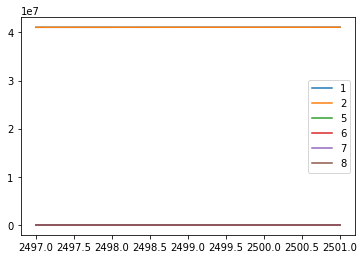

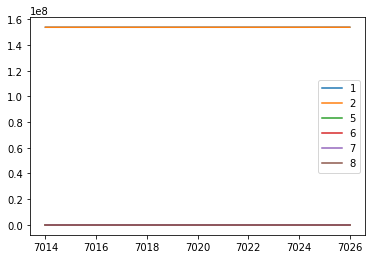

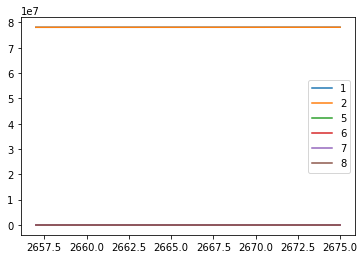

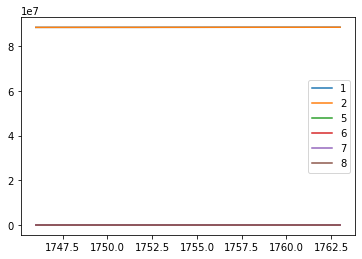

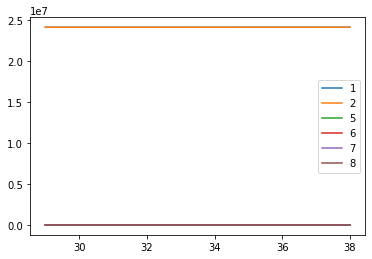

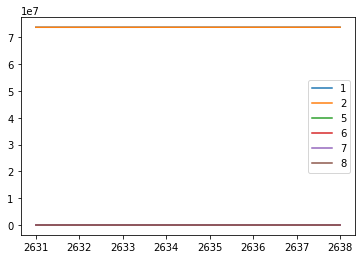

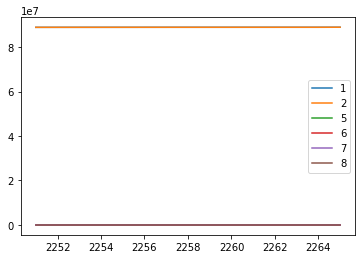

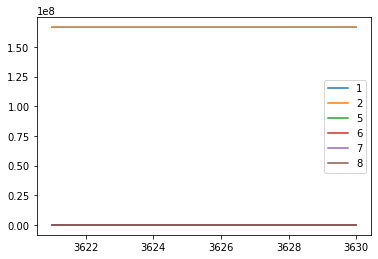

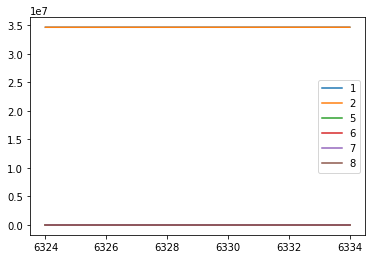

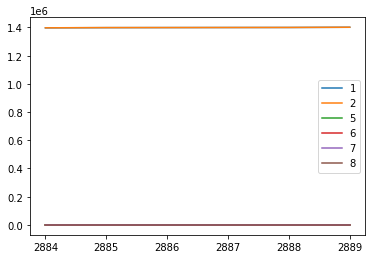

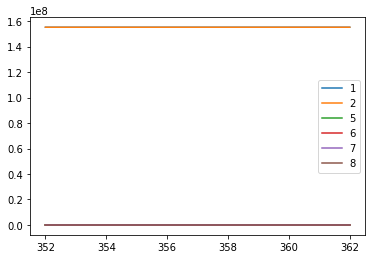

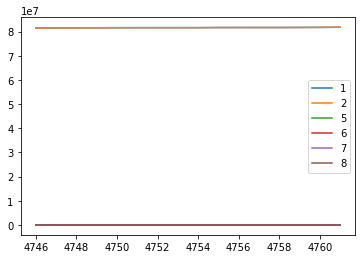

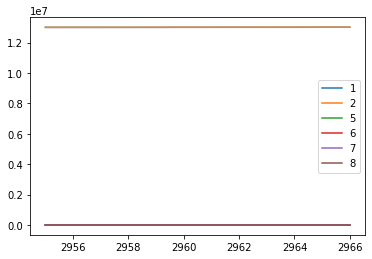

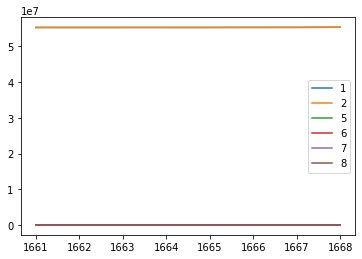

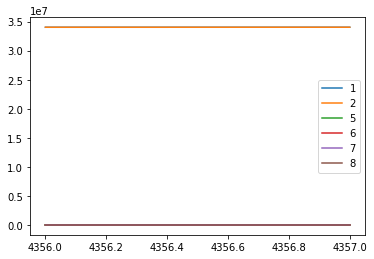

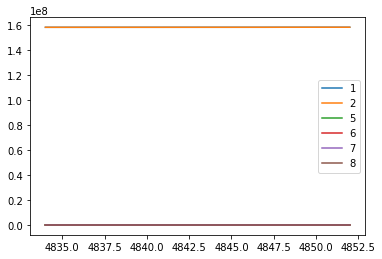

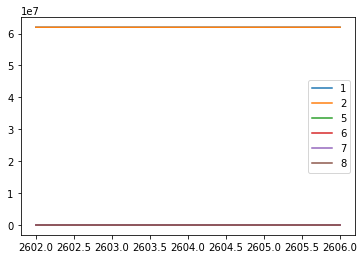

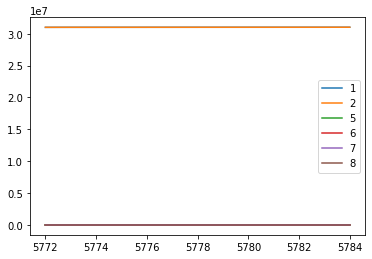

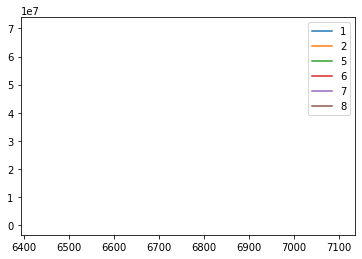

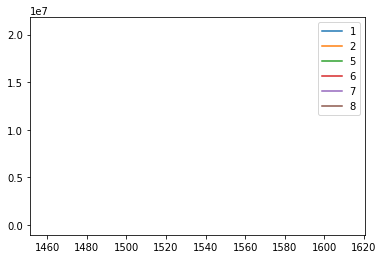

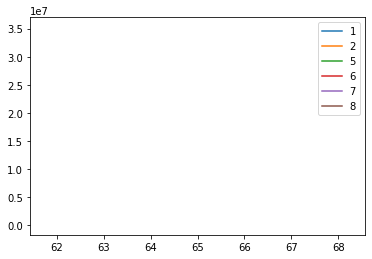

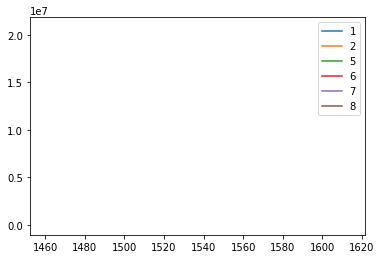

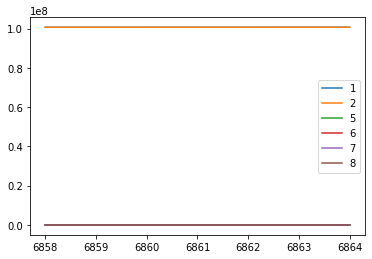

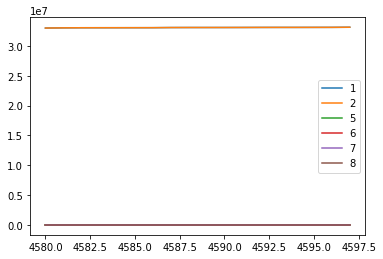

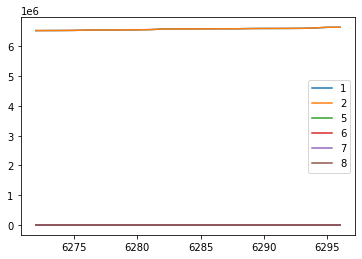

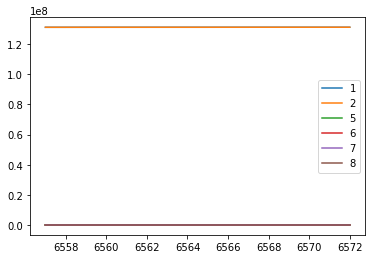

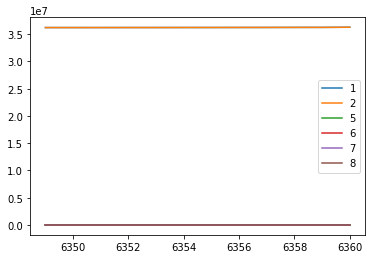

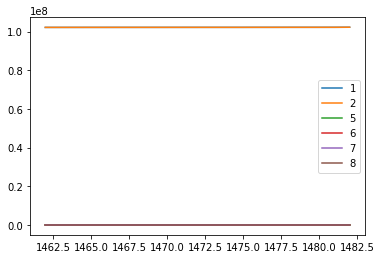

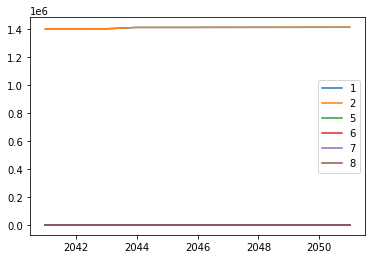

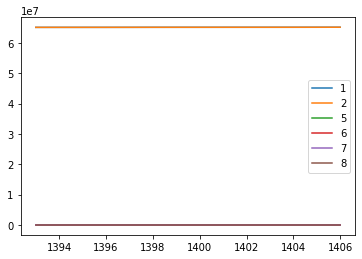

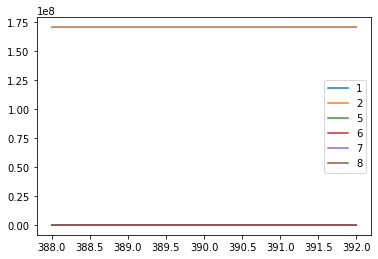

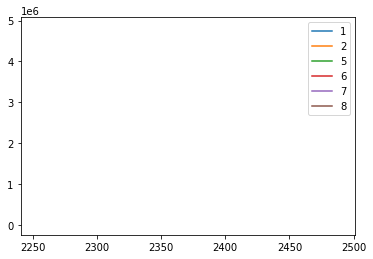

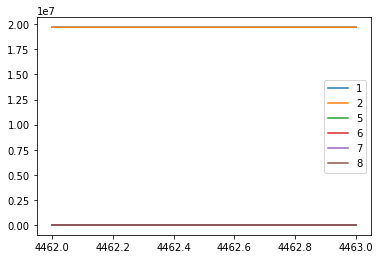

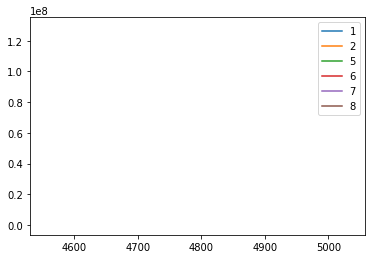

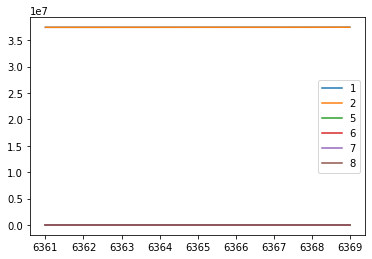

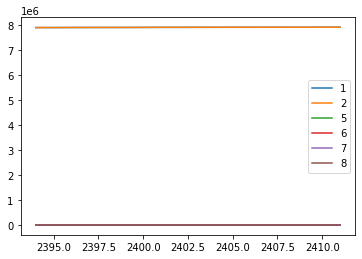

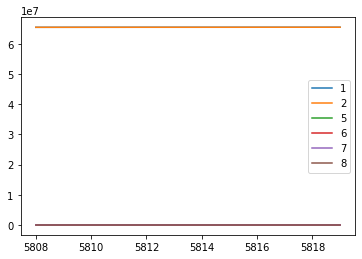

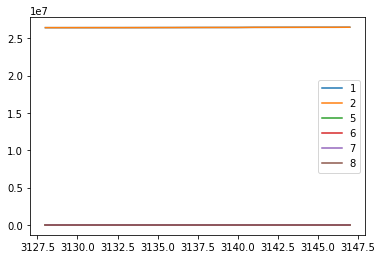

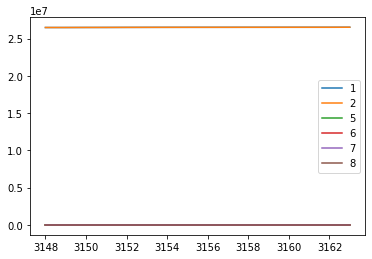

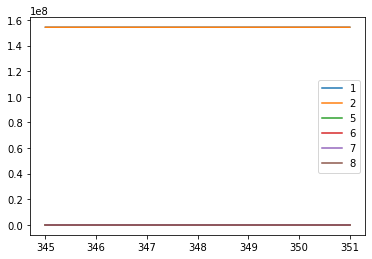

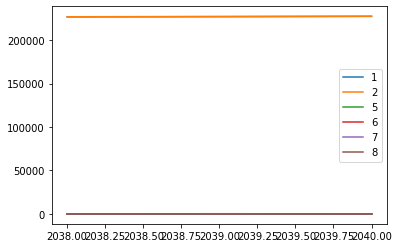

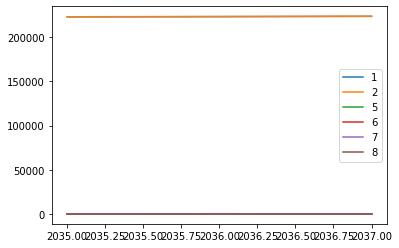

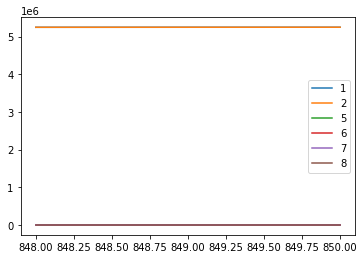

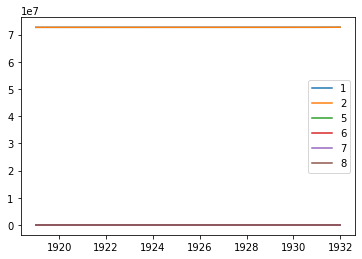

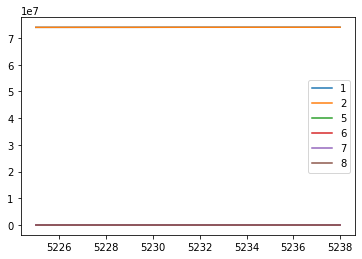

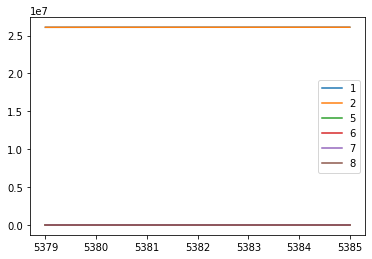

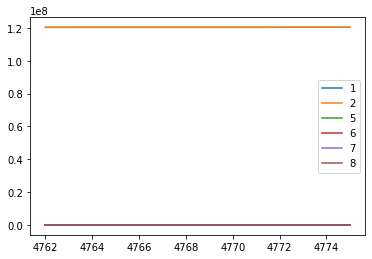

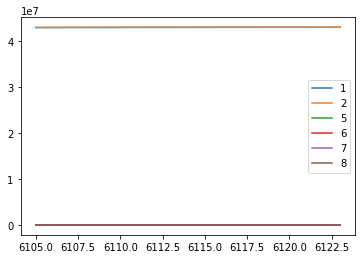

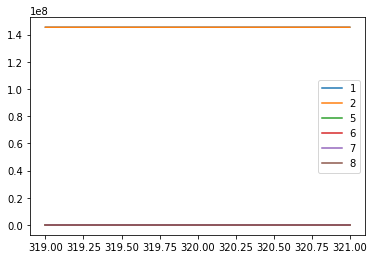

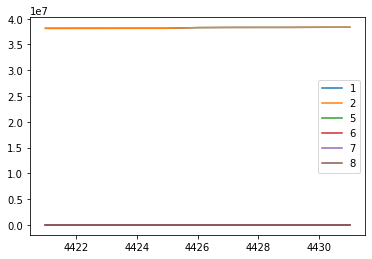

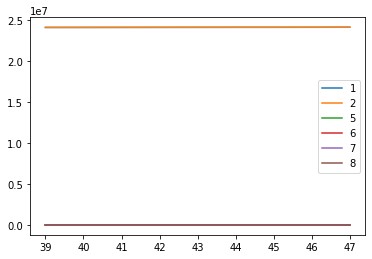

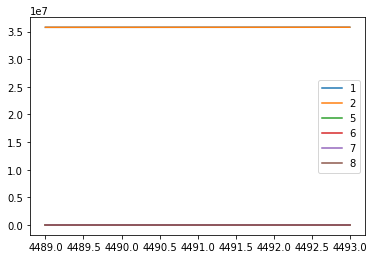

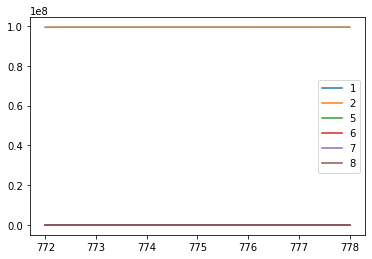

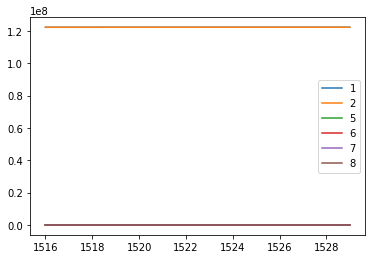

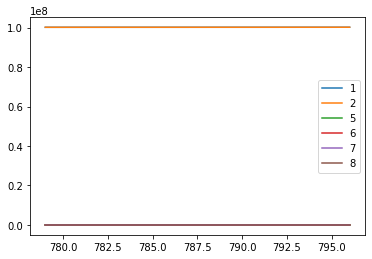

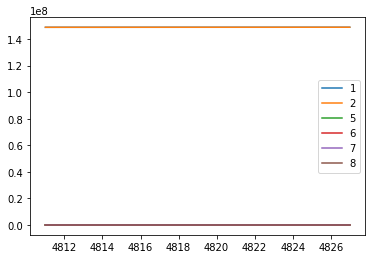

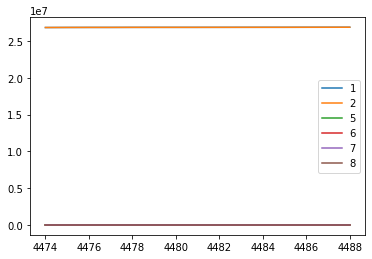

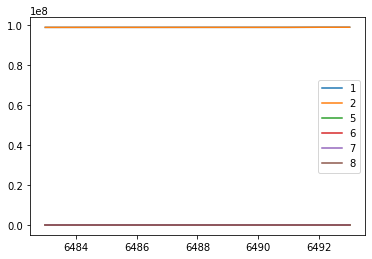

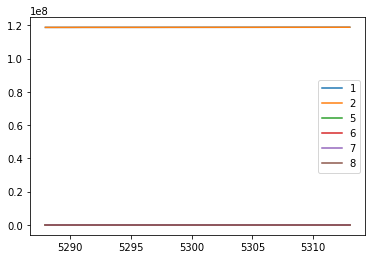

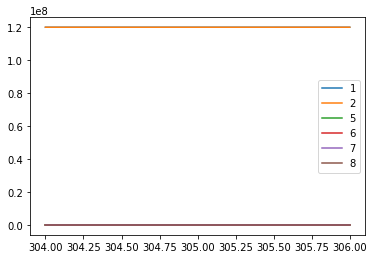

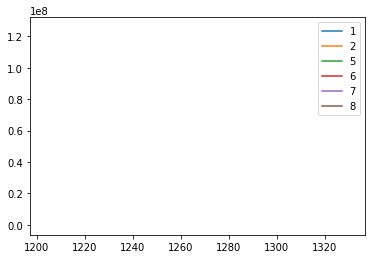

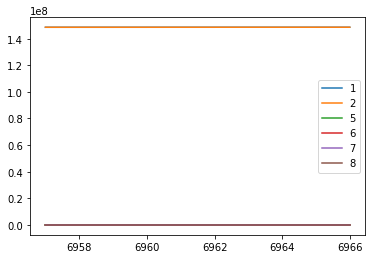

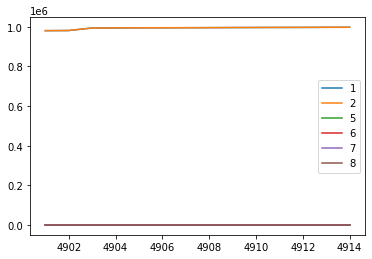

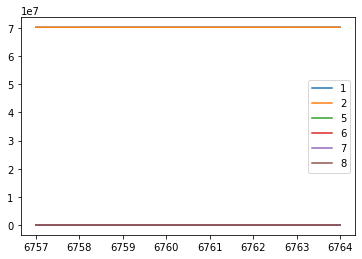

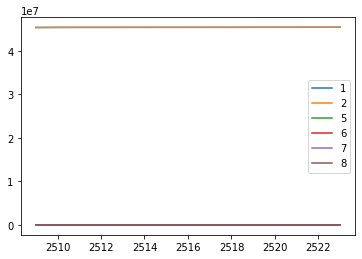

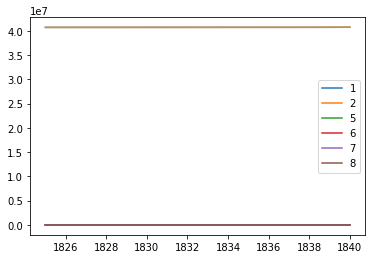

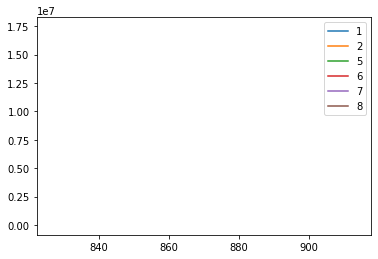

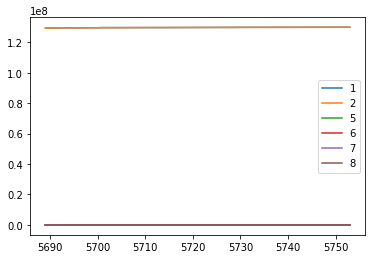

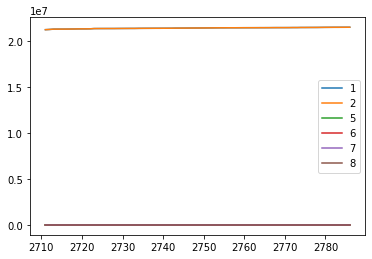

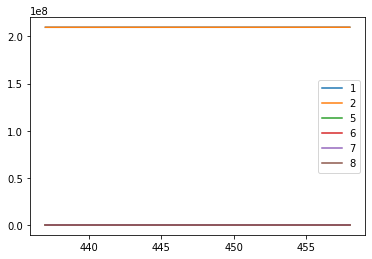

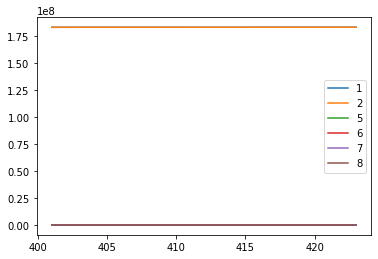

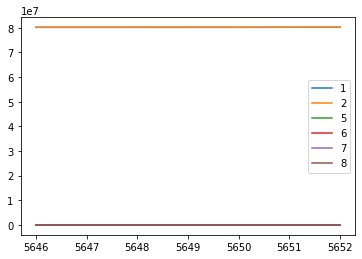

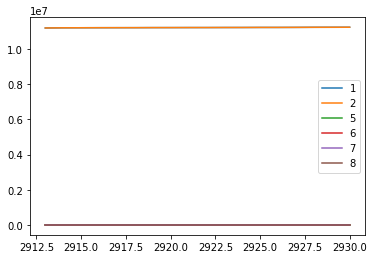

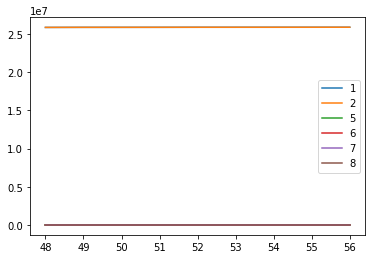

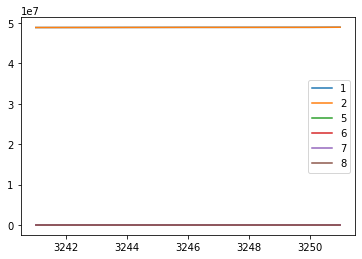

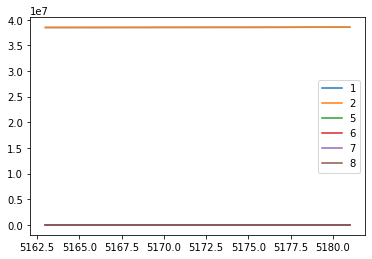

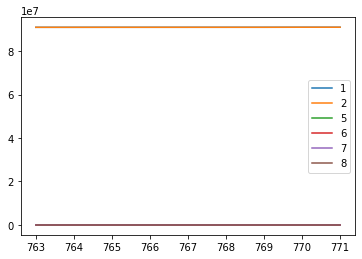

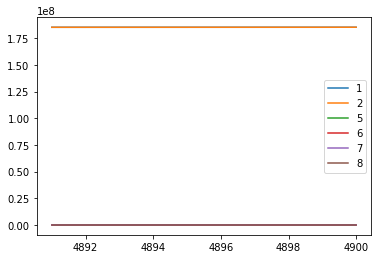

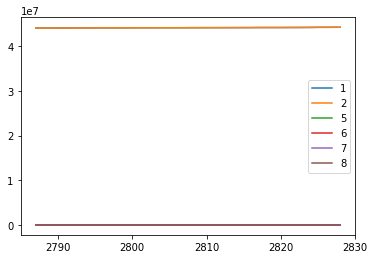

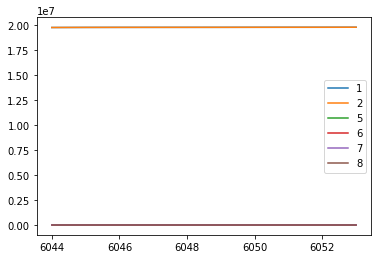

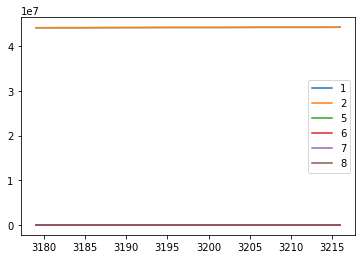

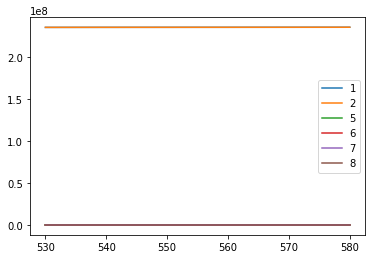

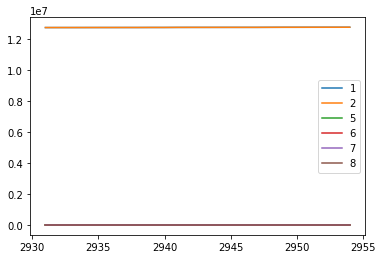

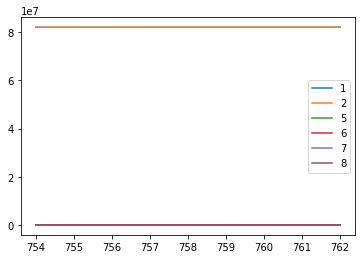

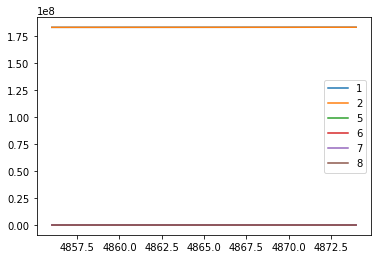

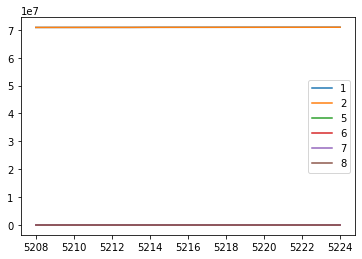

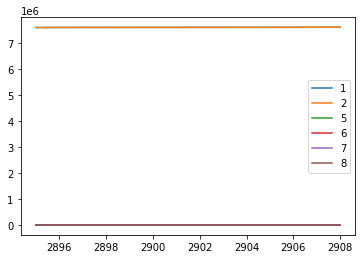

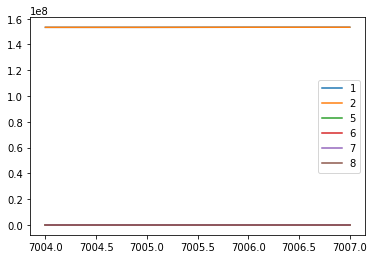

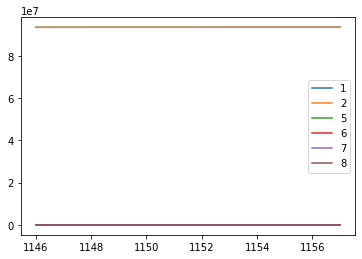

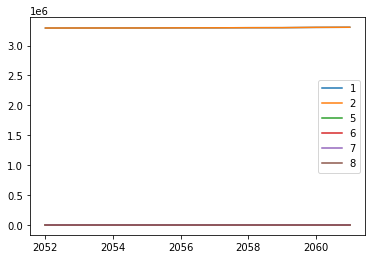

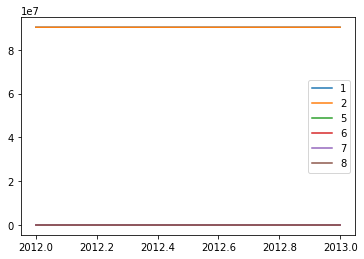

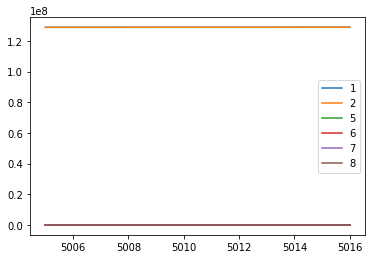

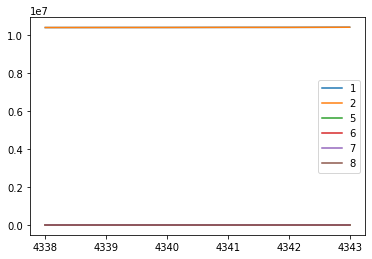

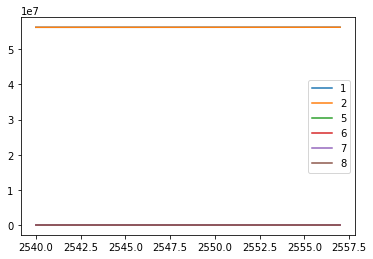

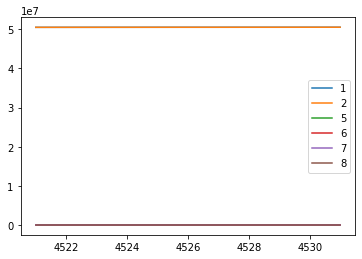

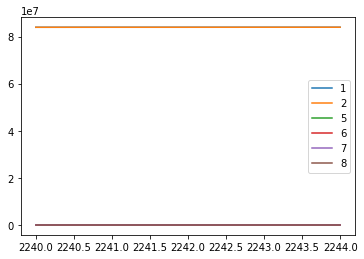

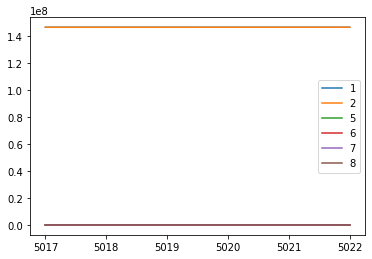

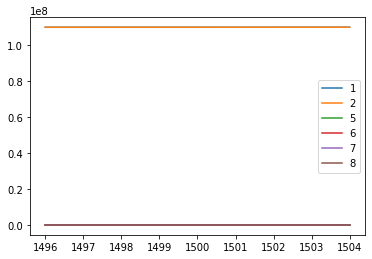

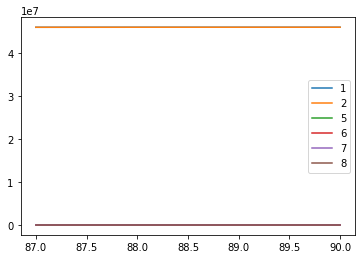

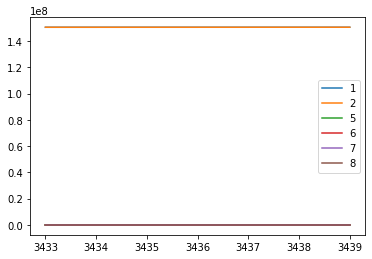

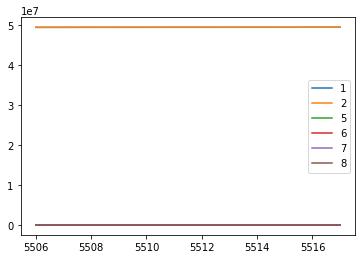

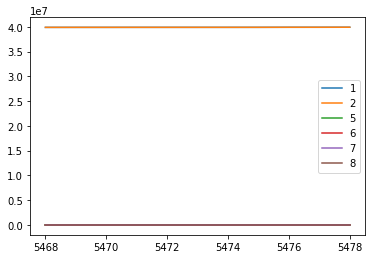

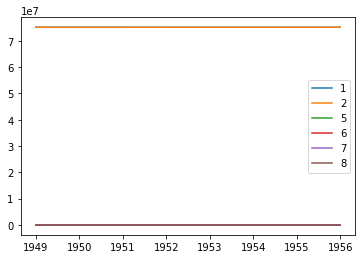

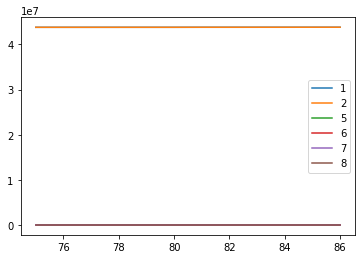

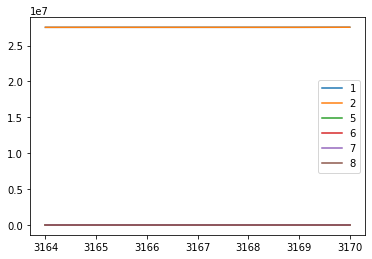

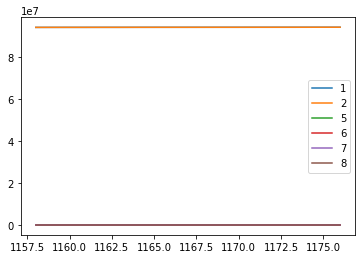

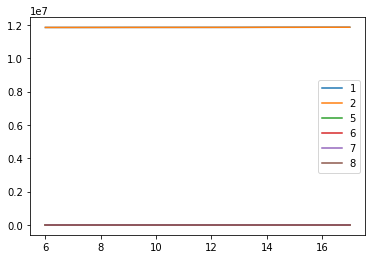

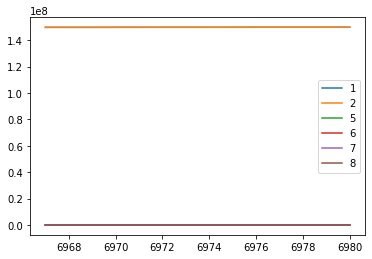

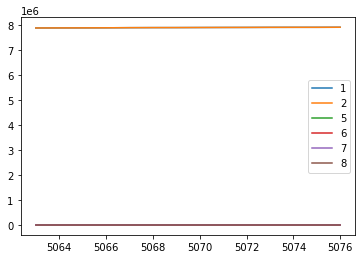

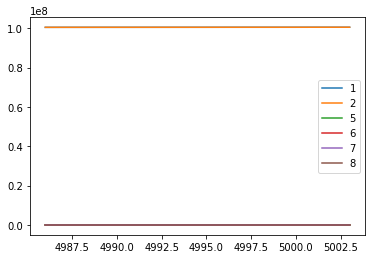

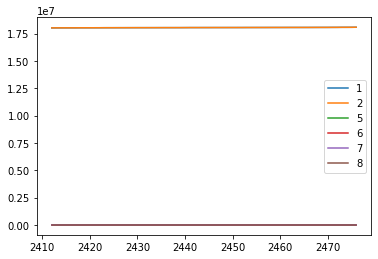

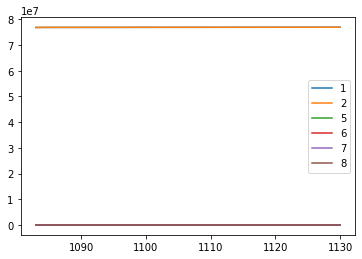

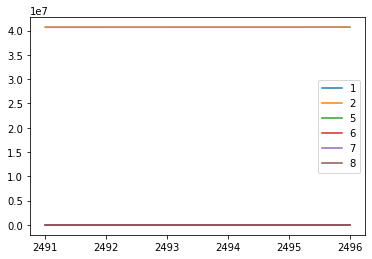

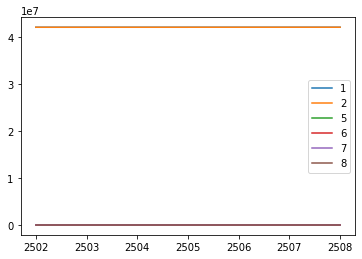

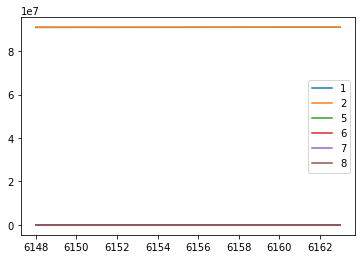

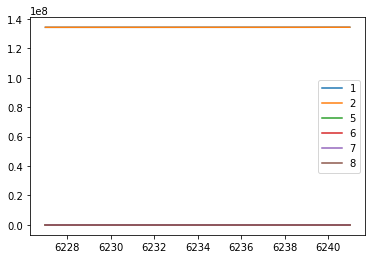

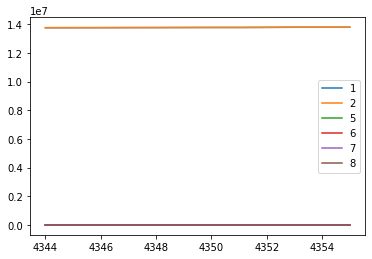

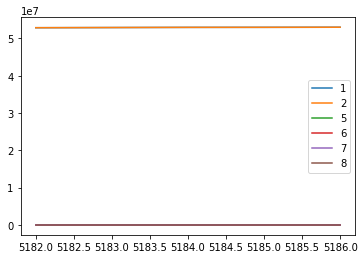

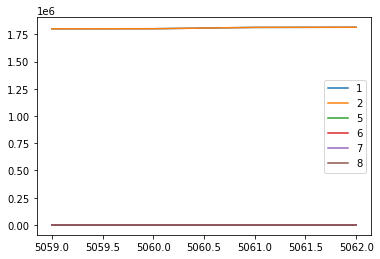

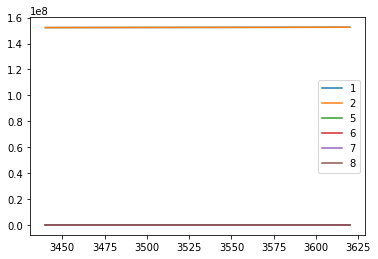

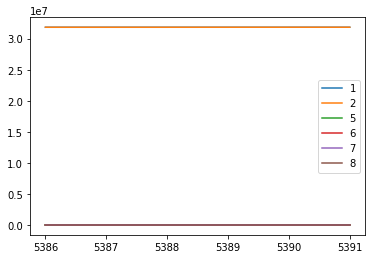

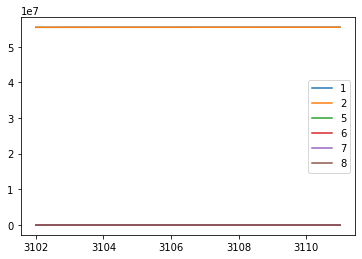

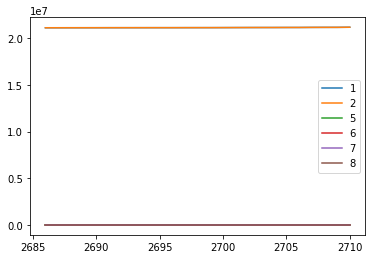

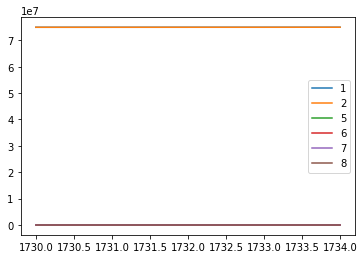

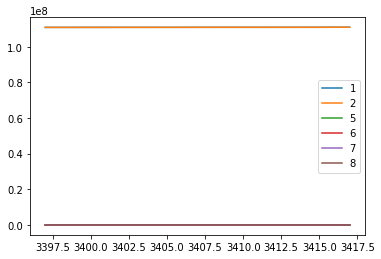

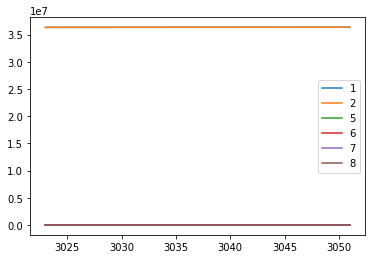

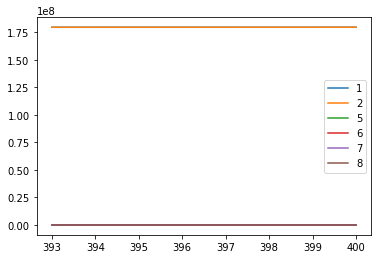

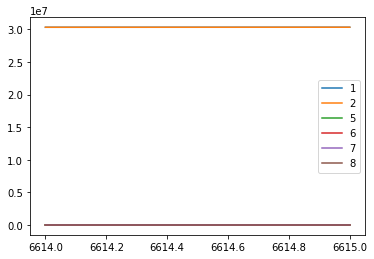

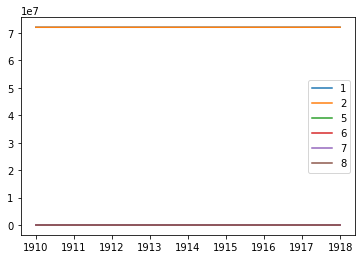

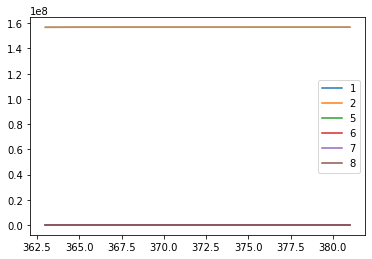

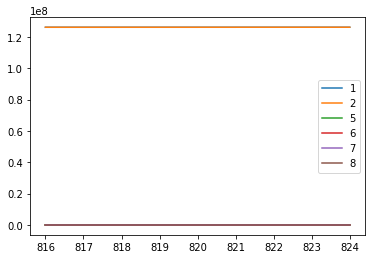

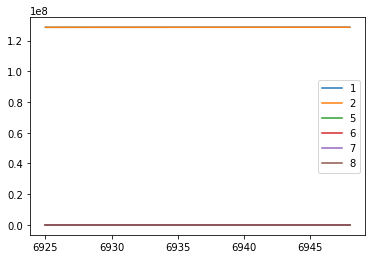

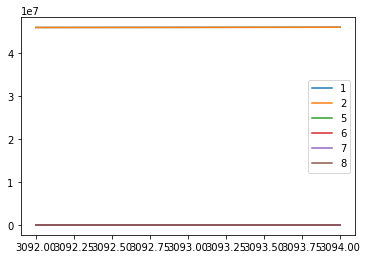

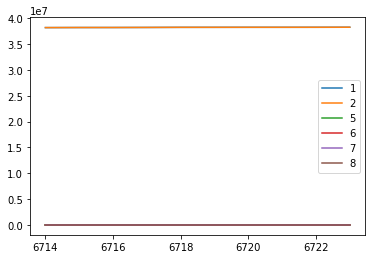

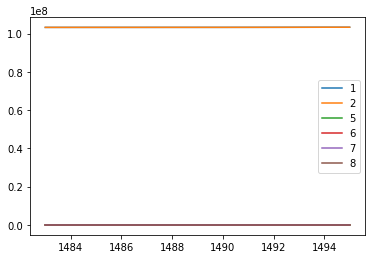

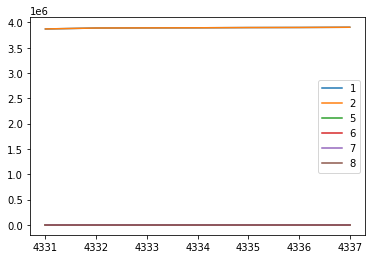

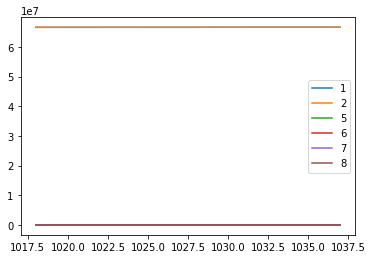

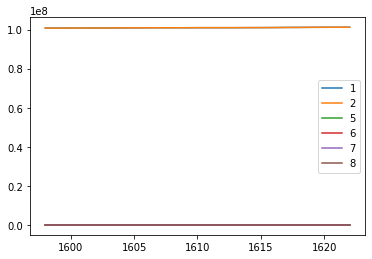

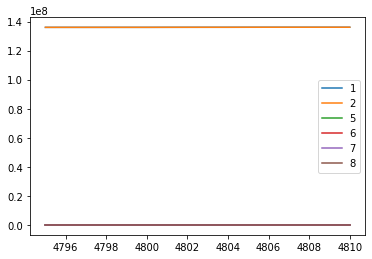

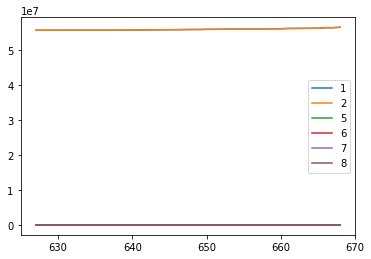

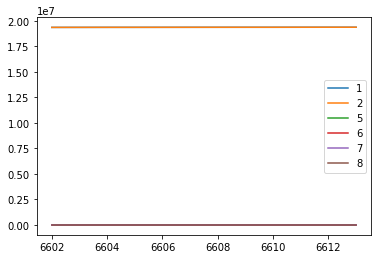

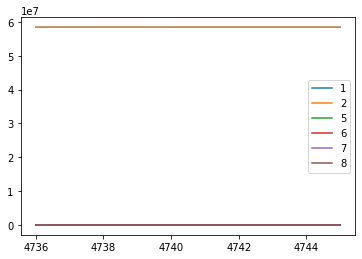

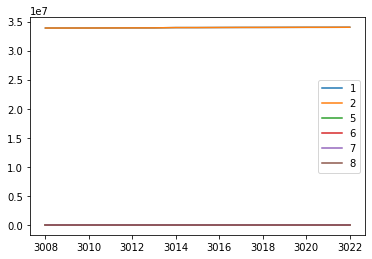

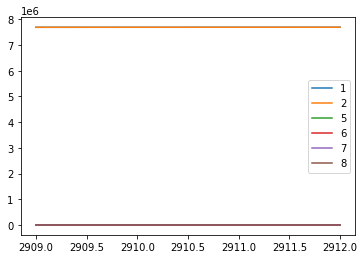

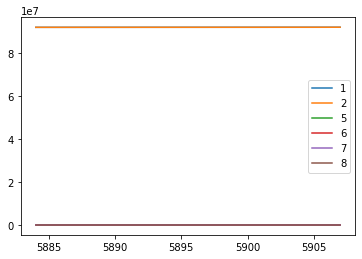

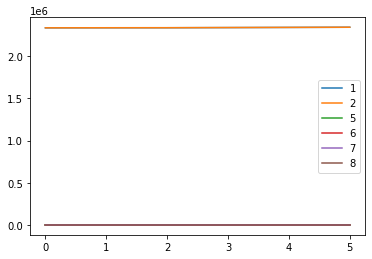

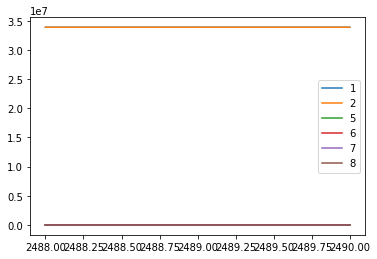

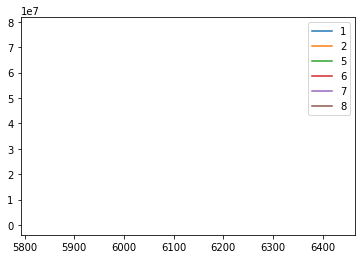

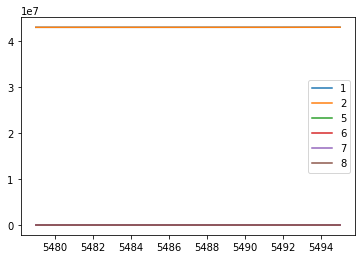

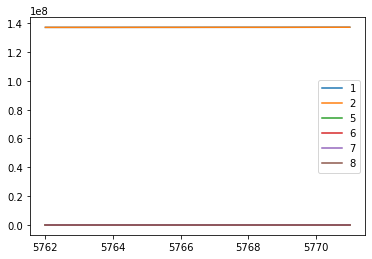

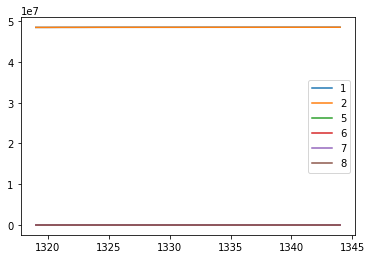

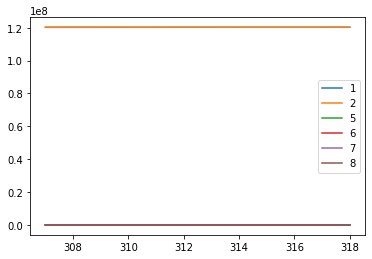

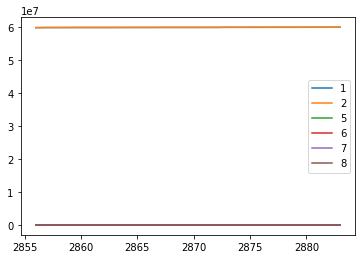

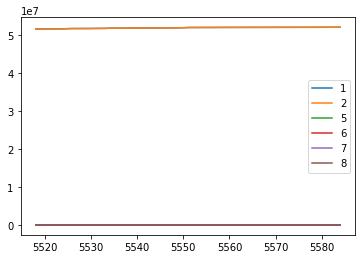

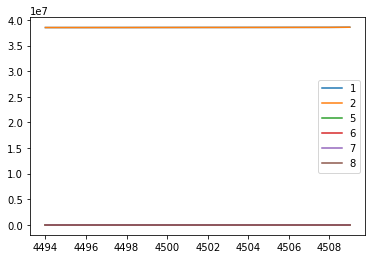

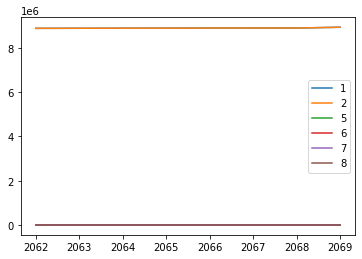

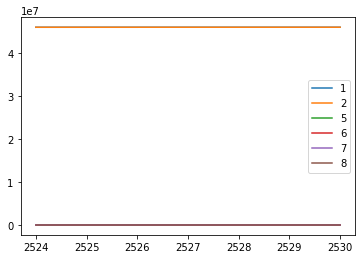

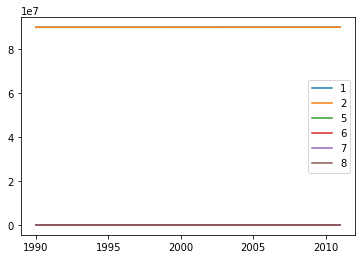

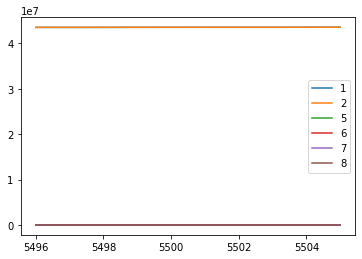

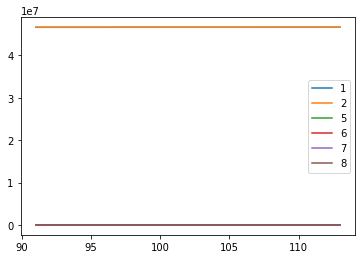

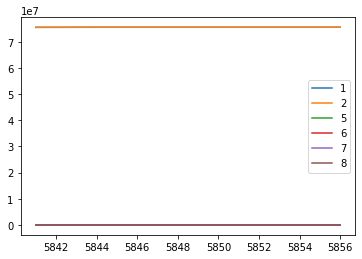

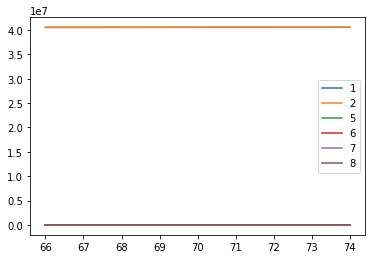

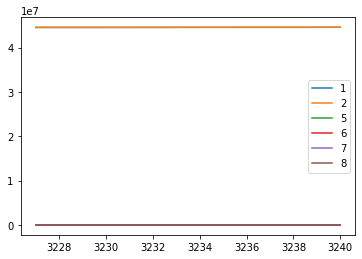

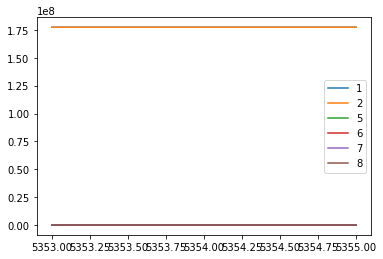

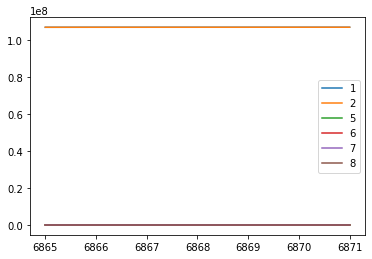

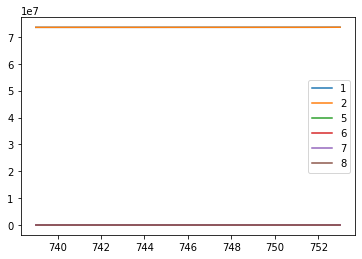

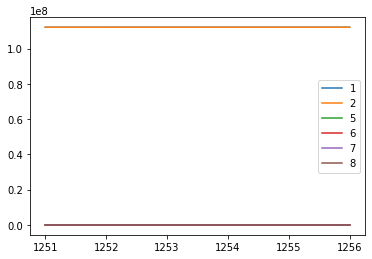

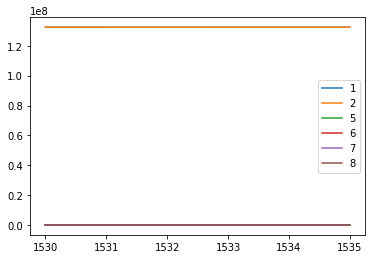

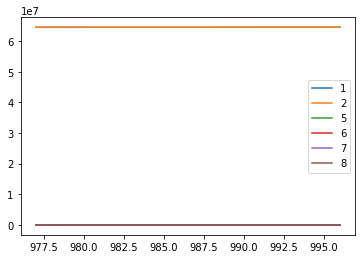

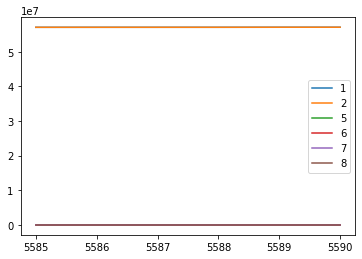

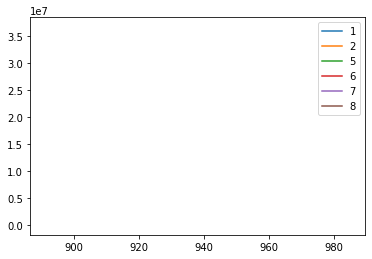

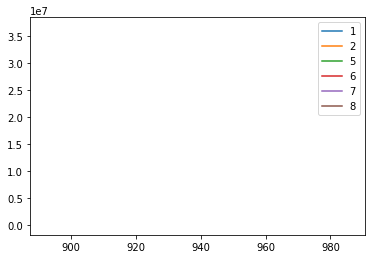

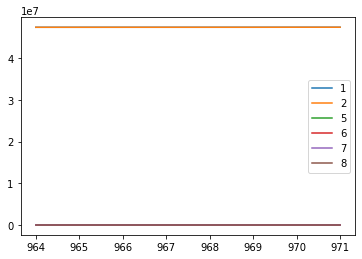

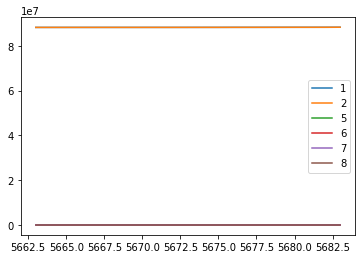

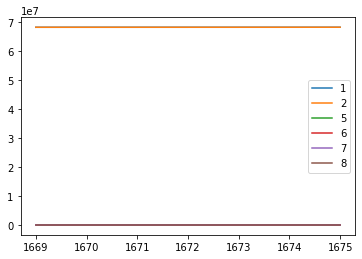

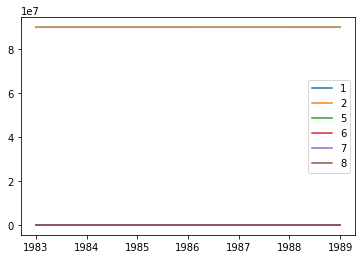

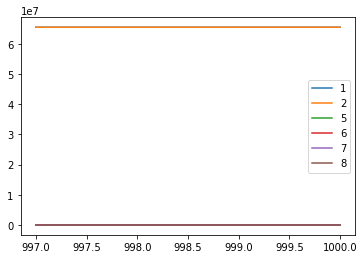

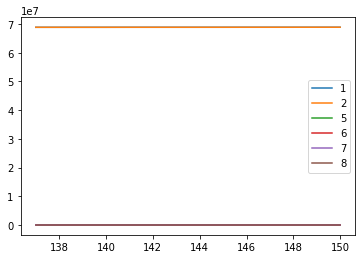

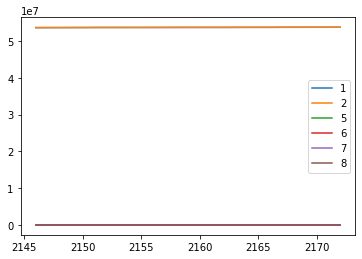

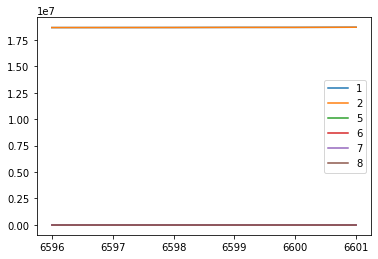

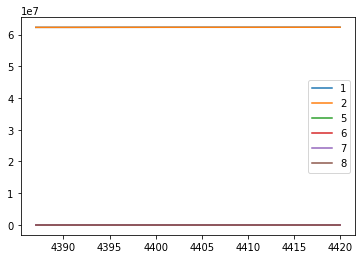

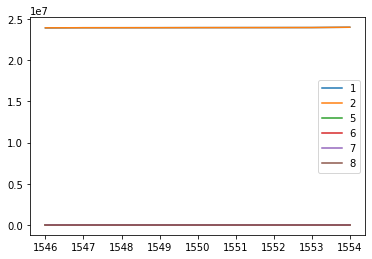

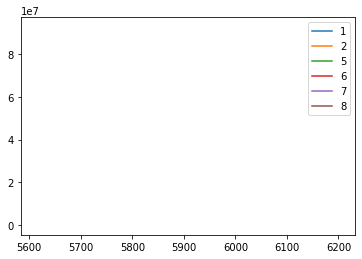

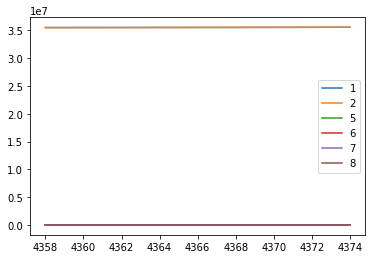

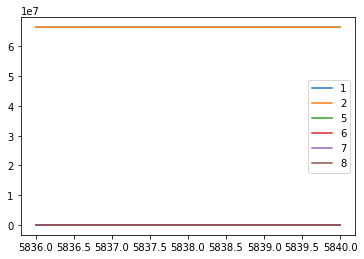

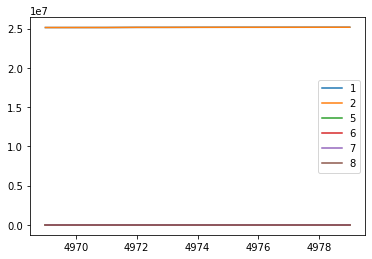

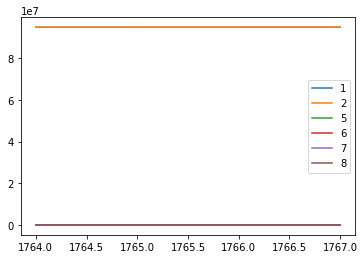

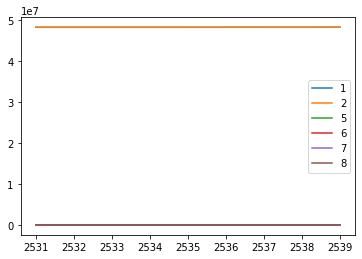

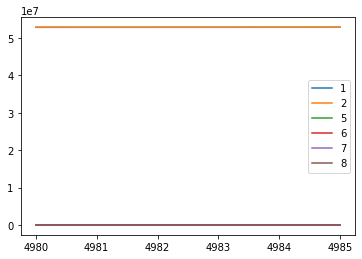

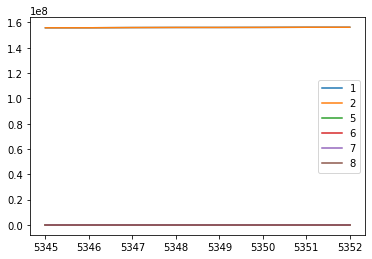

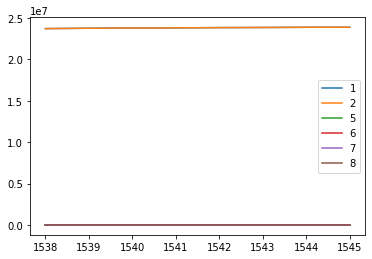

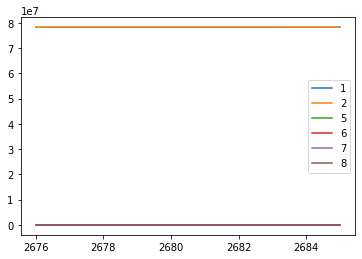

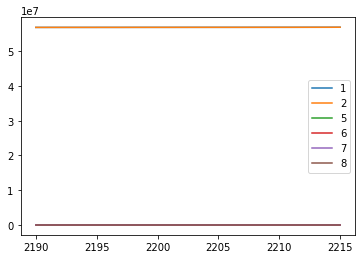

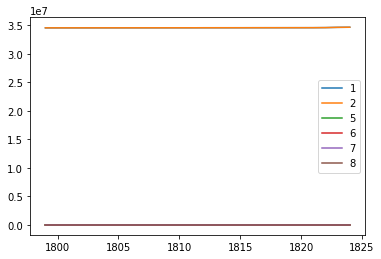

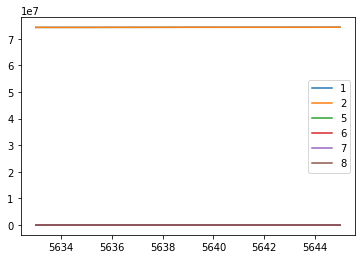

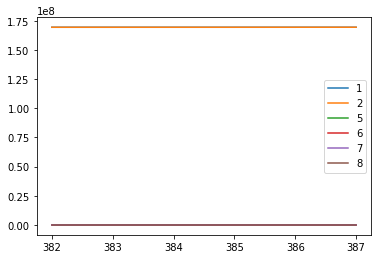

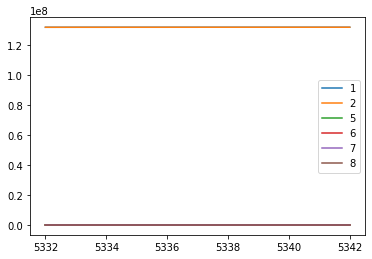

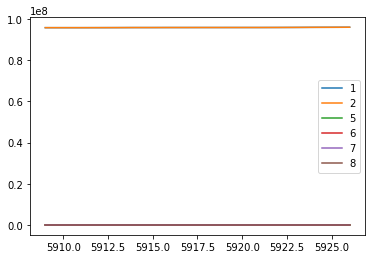

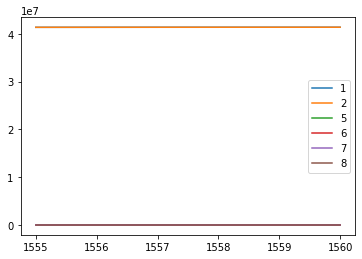

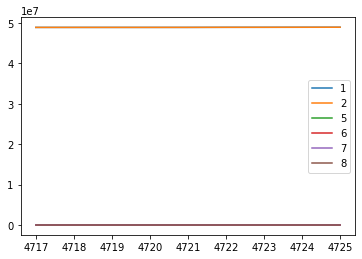

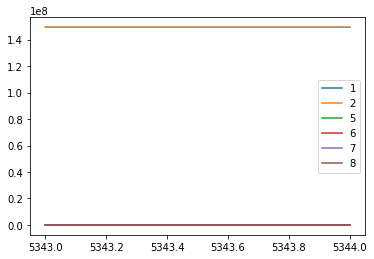

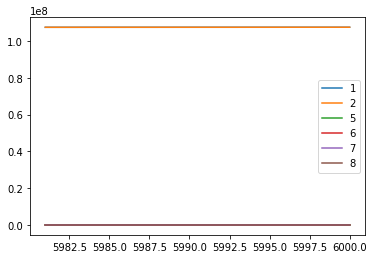

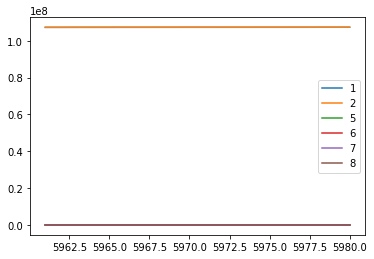

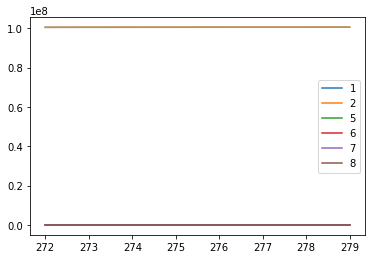

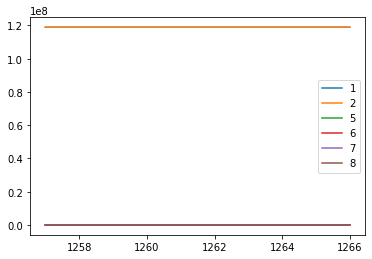

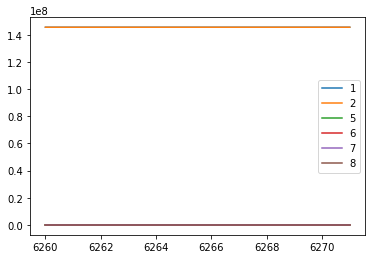

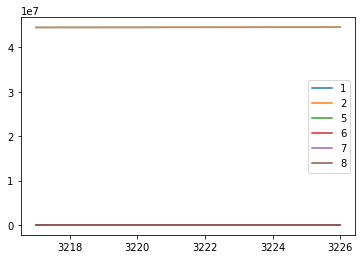

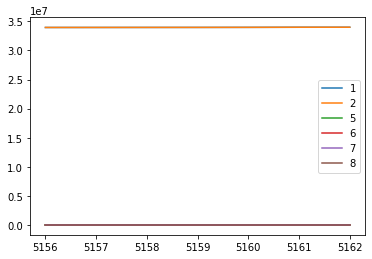

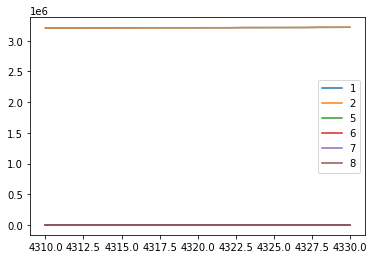

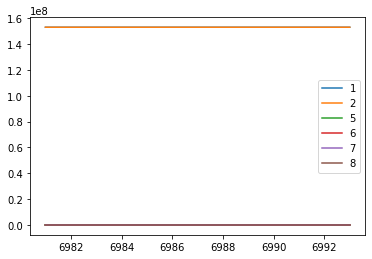

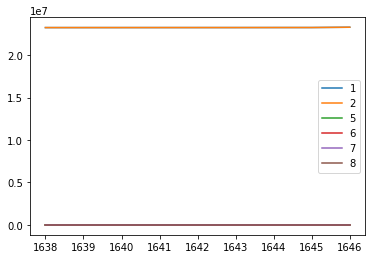

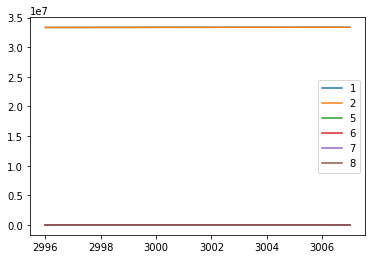

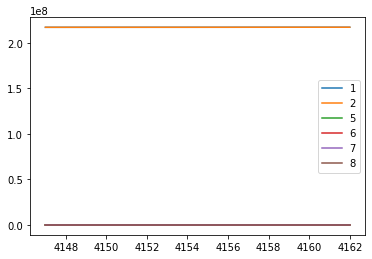

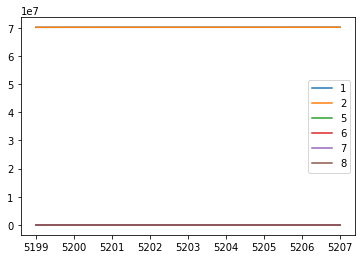

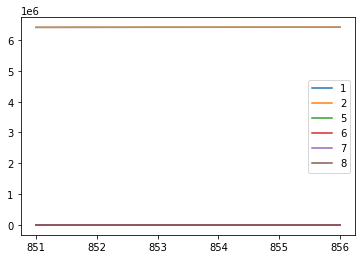

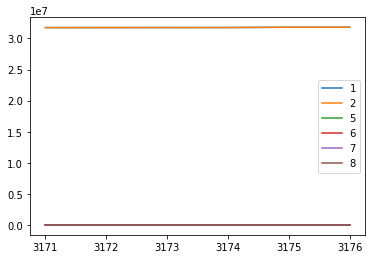

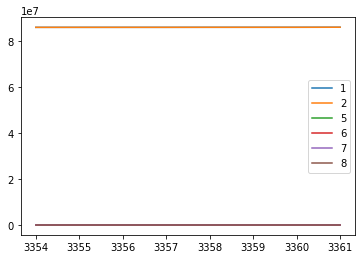

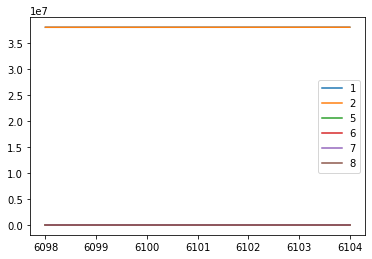

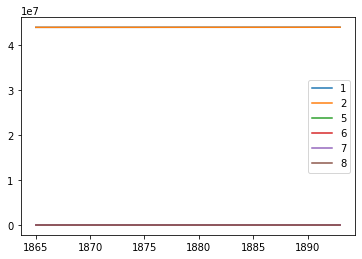

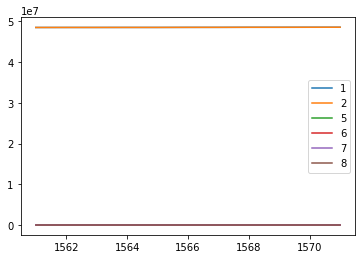

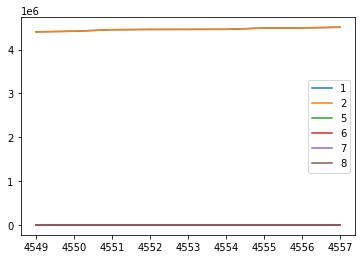

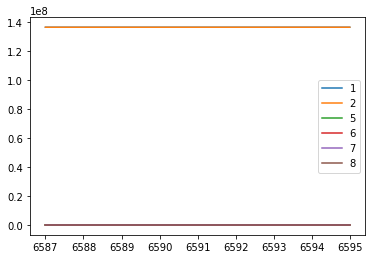

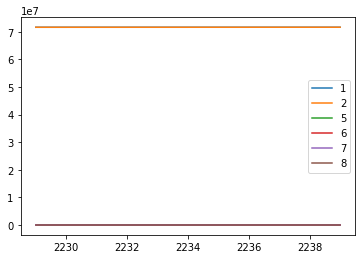

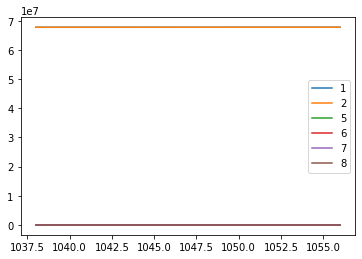

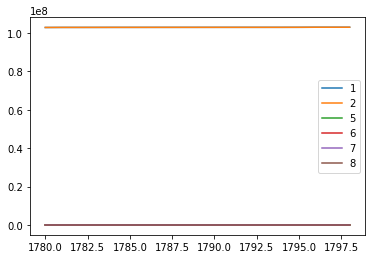

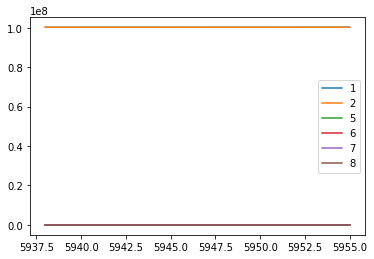

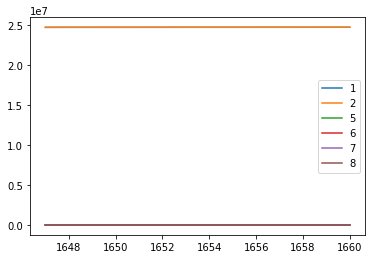

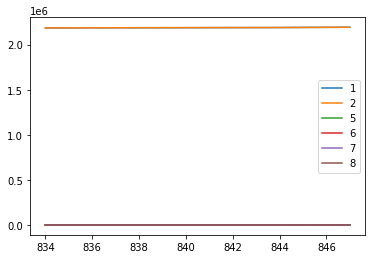

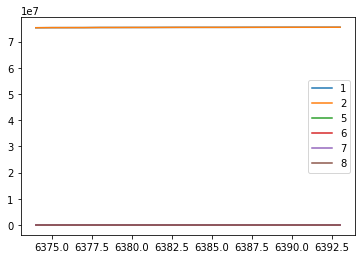

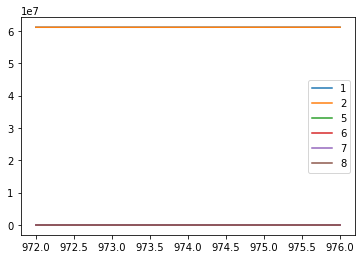

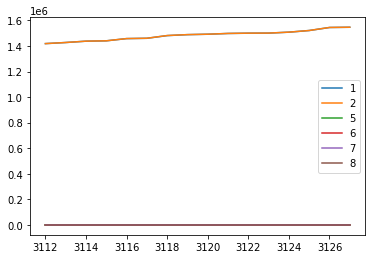

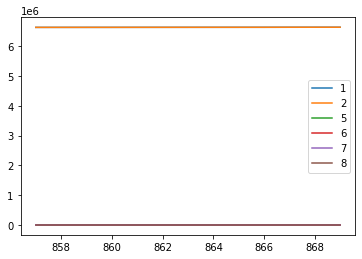

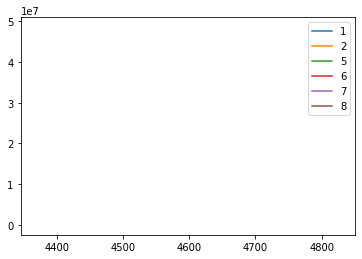

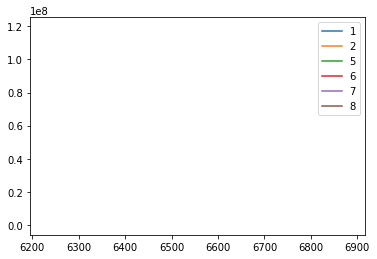

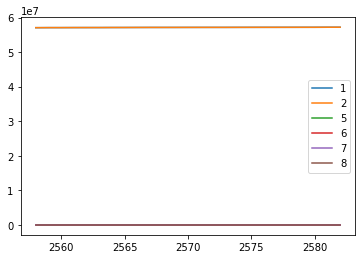

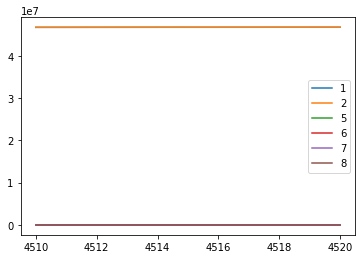

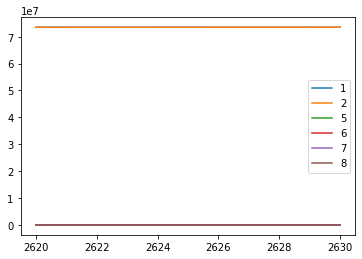

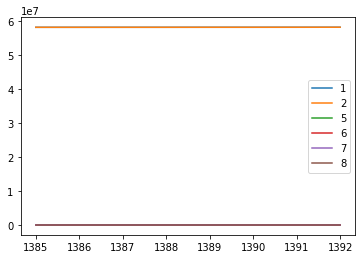

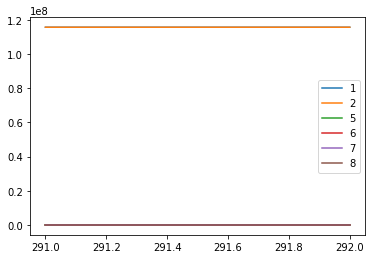

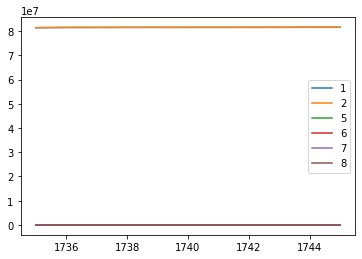

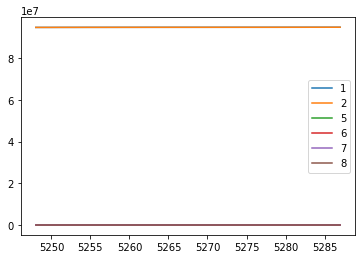

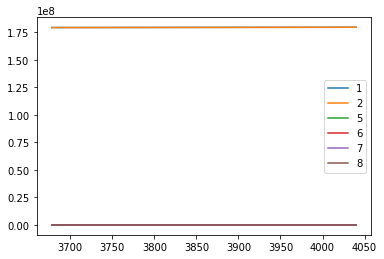

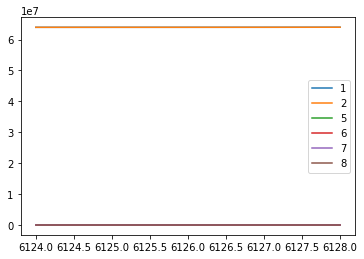

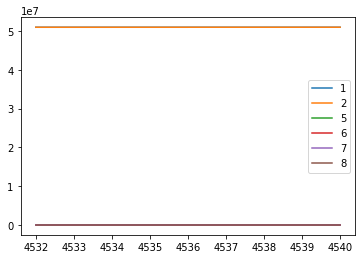

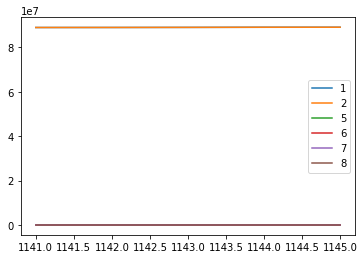

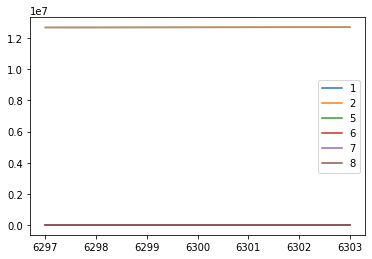

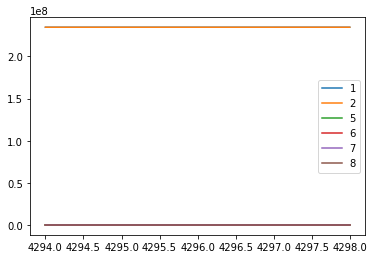

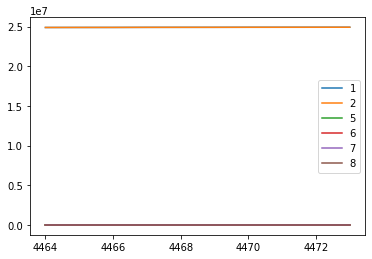

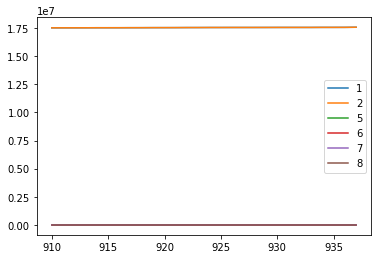

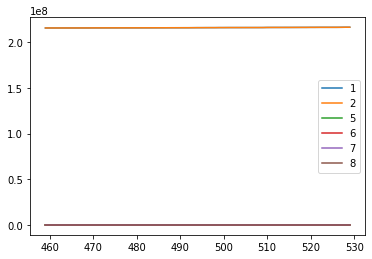

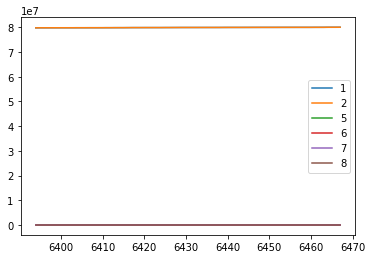

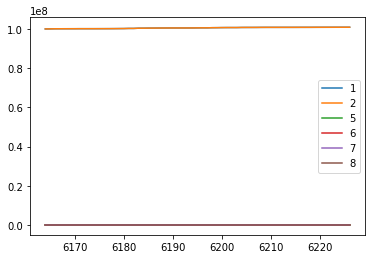

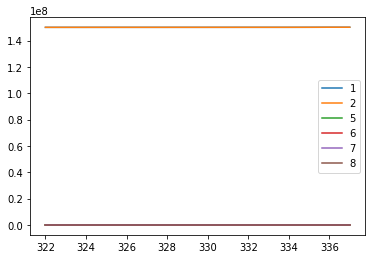

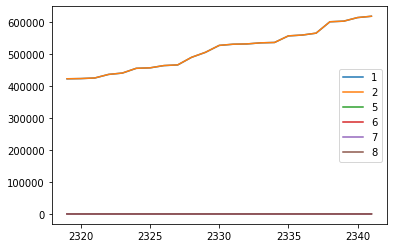

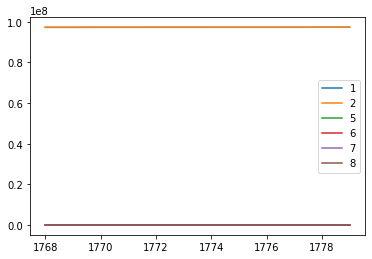

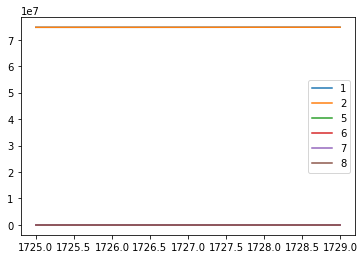

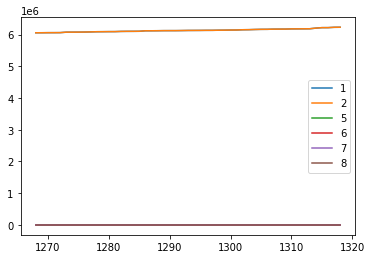

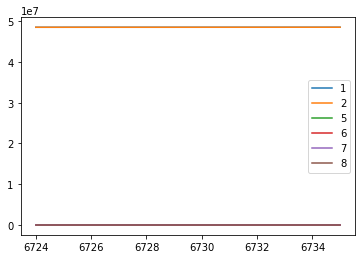

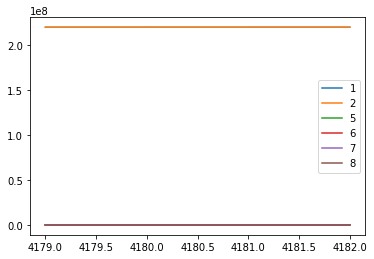

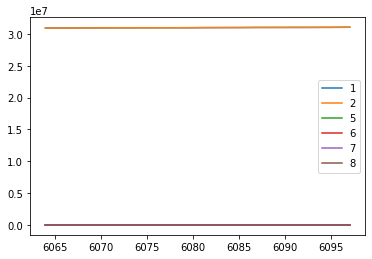

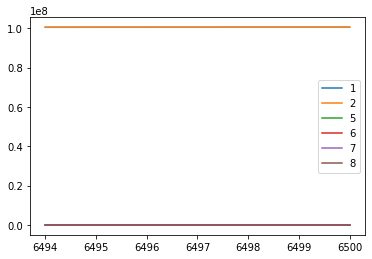

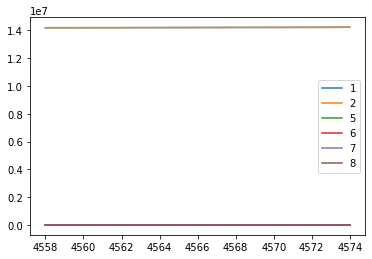

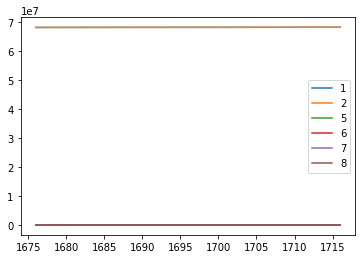

In [60]:
group_df.plot()

In [51]:
for g,df in group_df:
    display(df)
    print("g",g)
    break

,0,1,2,3,4,5,6,7,8
1349,chr12,53701272,53701497,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,225,225,1.0
1350,chr12,53701628,53701713,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,85,85,1.0
1351,chr12,53701835,53701917,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,82,82,1.0
1352,chr12,53702065,53702133,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,68,68,1.0
1353,chr12,53702218,53702312,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,94,94,1.0
1354,chr12,53702508,53702599,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,91,91,1.0
1355,chr12,53702743,53702804,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,61,61,1.0
1356,chr12,53702940,53703065,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,125,125,1.0
1357,chr12,53703384,53703505,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,121,121,1.0
1358,chr12,53708081,53708225,AAAS,cds-NP_001166937.1;rna-NM_001173466.2:chr12:53...,1,144,144,1.0


g AAAS
